# Hola Cesar! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente trabajo Cesar! Veo que tienes muy buen manejo del código necesario y la creatividad para proponer visualizaciones y métricas que responden preguntas interesantes. En general fuiste mucho más allá de lo necesario y eso es muy admirable. Lo único que te invito a revisar es el ltv por cliente por fuente, me parece que la métrica que quieres mostrar se calcula de otra forma. Por otro lado, las métricas de romi se podrían hacer más precisas si se incluye en gasto mensual, y así se calcula el romi mensual y se tendría mejor visibilidad de qué sucedió cada mes. 
    
Realiza la corrección indicada y tu notebook estará listo.
    
Saludos!    
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, ya entendí lo que querías mostrar y revisandolo en detalle veo que está correcto. Mi consejo final es que agregues más resultados numéricos y métricas en tus conclusiones. Más allá de eso, solo te felicito por la gran calidad de tu trabajo, realmente fuiste mucho más allá de lo requerido.
    
Saludos!    
</div>

----

# Introducción
- Como pasante en el departamento de análisis de Yandex.Afisha, mi primera tarea es ayudar a optimizar los costos de marketing. Tengo registros del servidor con datos sobre las visitas a Yandex.Afisha desde junio 2017 a mayo de 2018, un archivo de volcado con todos los pedidos del período y estadísticas de gastos de marketing.

- Planeo averiguar cómo la gente usa el producto, cuánto tiempo pasa desde el momento en que el cliente visita el sitio hasta la primera compra, cuánto dinero aporta cada cliente y la efectividad de las fuentes de adquisición de clientes.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format

- Análisis preliminar de la estructura de datos.

In [2]:
visits_path   = 'visits_log_us.csv'
orders_path   = 'orders_log_us.csv'
costs_path    = 'costs_us.csv'
platform_path = 'https://code.s3.yandex.net/datasets/'

try:
    visits   = pd.read_csv(visits_path, nrows=500)
    orders   = pd.read_csv(orders_path, nrows=500)
    costs    = pd.read_csv(costs_path, nrows=500)
except:
    visits  = pd.read_csv(platform_path+visits_path, nrows=500)
    orders  = pd.read_csv(platform_path+orders_path, nrows=500)
    costs   = pd.read_csv(platform_path+costs_path, nrows=500)

In [3]:
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 19.7+ KB
None


- Convertiré el campo "Device" al tipo categoría, y los campos "Ts de inicio" y "Ts de fin" al tipo DateTime.

In [4]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [5]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 11.8+ KB
None


- Convertiré el campo "Buy Ts" al tipo DateTime.

In [6]:
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB
None


- Convertiré el campo "dt" al tipo DateTime.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien, aunque faltó agregar que no hay nulos
</div>

## Carga de datos de forma optimizada

In [7]:
try:
    visits   = pd.read_csv(visits_path,  
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])
    orders   = pd.read_csv(orders_path,
                  parse_dates=['Buy Ts'])
    costs    = pd.read_csv(costs_path,
                  parse_dates=['dt'])
except:
    visits  = pd.read_csv(platform_path+visits_path,  
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])
    orders  = pd.read_csv(platform_path+orders_path,
                  parse_dates=['Buy Ts'])
    costs   = pd.read_csv(platform_path+costs_path,
                  parse_dates=['dt']) 

### Preprocesamiento de datos

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
visits.duplicated().sum()

0

- No hay duplicados

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders.duplicated().sum()

0

- No hay duplicados

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs.duplicated().sum()

0

- No hay duplicados

- Para facilitar el trabajo, voy a modificar el nombre de las columnas. Eliminaré los espacios y pondré todas las letras en minúscula.

In [17]:
visits = visits.rename(columns = {'End Ts':'End_Ts','Source Id':'Source_Id','Start Ts':'Start_Ts'})
orders = orders.rename(columns= {'Buy Ts':'Buy_Ts'})
visits = visits.rename(str.lower, axis='columns')
orders = orders.rename(str.lower, axis='columns')

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, aunque hubiese sido mejor que renombraras las columnas a formato snakecase, además de separar palabras con guión bajo, se convierte todo a minúsculas
</div>

## Realización de informes y cálculo de métricas

### Producto
#### ¿Cuántas personas utilizan el servicio cada día, semana y mes?

In [18]:
visits['day']    = visits['start_ts'].dt.day
visits['week']   = visits['start_ts'].dt.isocalendar().week
visits['month']  = visits['start_ts'].dt.month
visits['year']   = visits['start_ts'].dt.year

dau = visits.groupby(['day','month','year']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['week','year']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['month','year']).agg({'uid':'nunique'}).mean()

print('{:} Personas usan la app todos los días.'.format(int(dau)))
print('{:} Personas usan la app cada semana.'.format(int(wau)))
print('{:} Personas usan la app cada mes.'.format(int(mau)))

907 Personas usan la app todos los días.
5716 Personas usan la app cada semana.
23228 Personas usan la app cada mes.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

La obtención de las nuevas columnas están bien, pero pueden generar errores si la data tiene un rango de más de un año, puesto que algunos meses o semanas se repetirían más de una vez y entonces no quedaría claro a cual año pertenece. Si usas el formato astype('datetime64[M]') para los meses y astype('datetime64[W]'), obtendrás formatos fechas que identifican al mes y semana respectivamente, en ambos se hace diferencia de año.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con las medias
</div>

- Número de usuarios por día

In [19]:
dau_graph = visits.groupby(['year','month','day']).agg({'uid':'nunique'})
dau_graph = dau_graph.reset_index()

dau_graph['day'] = dau_graph['day'].astype('string')
dau_graph['month'] = dau_graph['month'].astype('string')
dau_graph['year'] = dau_graph['year'].astype('string')

dau_graph['xticks'] = dau_graph['month'] + '.' + dau_graph['year']

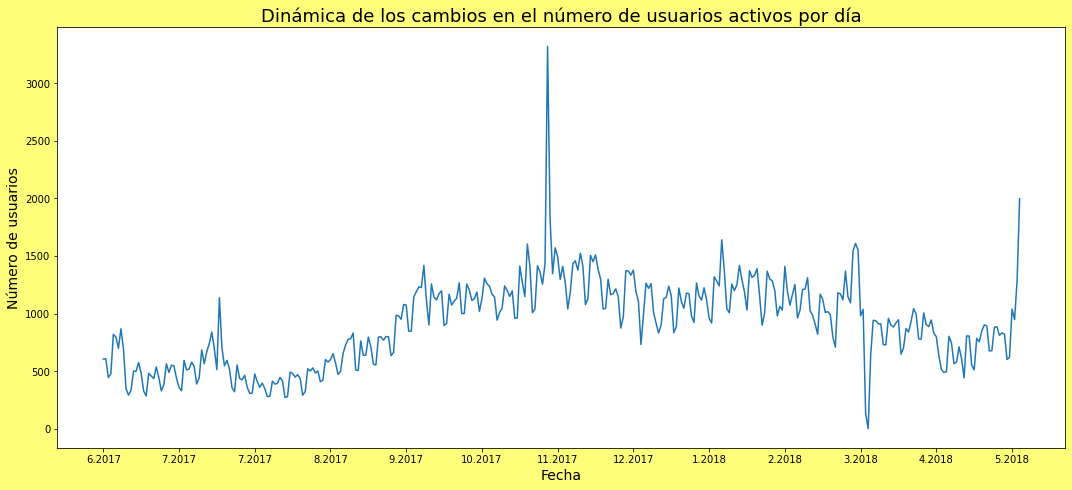

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph['uid'])
x_pos = np.arange(len(dau_graph['uid']))
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Número de usuarios', fontsize=14)
ax.set_title('Dinámica de los cambios en el número de usuarios activos por día', fontsize=18)
fig.patch.set_facecolor('xkcd:light yellow')
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)

plt.show()

El gráfico muestra claramente que el número de usuarios varía cada día de la semana. También podemos ver que el número de usuarios únicos creció desde julio de 2017, pero en noviembre se detuvo y comenzó a disminuir gradualmente.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

- Número de usuarios por mes

In [21]:
mau_graph = visits.groupby(['year','month']).agg({'uid':'nunique'})
mau_graph = mau_graph.reset_index()

mau_graph['month'] = mau_graph['month'].astype('string')
mau_graph['year'] = mau_graph['year'].astype('string')

mau_graph['xticks'] = mau_graph['month'] + '.' + mau_graph['year']

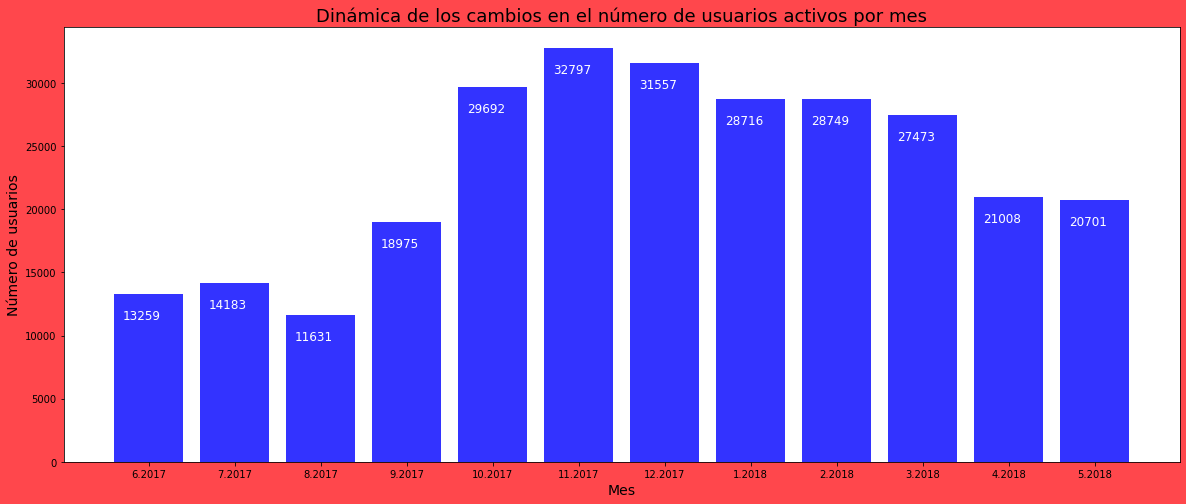

In [22]:
n = len(mau_graph['xticks'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, mau_graph['uid'],
        align='center',
        alpha=0.8, 
        color='blue')

fig.patch.set_facecolor('xkcd:light red')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de usuarios', fontsize=14)
plt.title('Dinámica de los cambios en el número de usuarios activos por mes', fontsize=18)
plt.xticks(ind, mau_graph['xticks'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.1, 
            i.get_height()-2000, 
            int(mau_graph['uid'][idx]), 
            fontsize=12,color='white')
plt.show()

El gráfico indica que la cantidad de usuarios aumentó en el último cuarto del año. El menor número de usuarios se observa en agosto. De agosto a noviembre, la cantidad de usuarios se triplica.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto! Muy bien al agrupar también por año para no caer en el problema que mencioné arriba
</div>

####  Factor Sticky

In [23]:
sticky_factor_w = dau/wau*100
sticky_factor_m = dau/mau*100
print('DAU/WAU is {:.2f}.'.format(sticky_factor_w[0]))
print('DAU/MAU is {:.2f}.'.format(sticky_factor_m[0]))

DAU/WAU is 15.88.
DAU/MAU is 3.91.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto! 
</div>

(DAU/MAU y DAU)

In [24]:
visits['date'] = visits['start_ts'].dt.floor('1D')
min_date = visits['date'].min()

dau_all_term = visits.groupby(['date']).agg({'uid':'nunique'})
dau_all_term = dau_all_term.reset_index()

In [25]:
def fill_sticky_factor(item):
    if int( (item-min_date) /np.timedelta64(1, 'D') ) > 29:
        dau_day_x = dau_all_term[dau_all_term['date'] == item]['uid'].min()
        maintime = item - pd.Timedelta(days=30)
        mau_day_x = visits.query('date <= @item and date > @maintime')['uid'].nunique()
        return dau_day_x / mau_day_x *100
    else:
        return 0

dau_all_term['sticky_factor'] = (
    dau_all_term['date'].apply(fill_sticky_factor)
)

- Omití los 30 primeros días para poder calcular los datos del primer mes

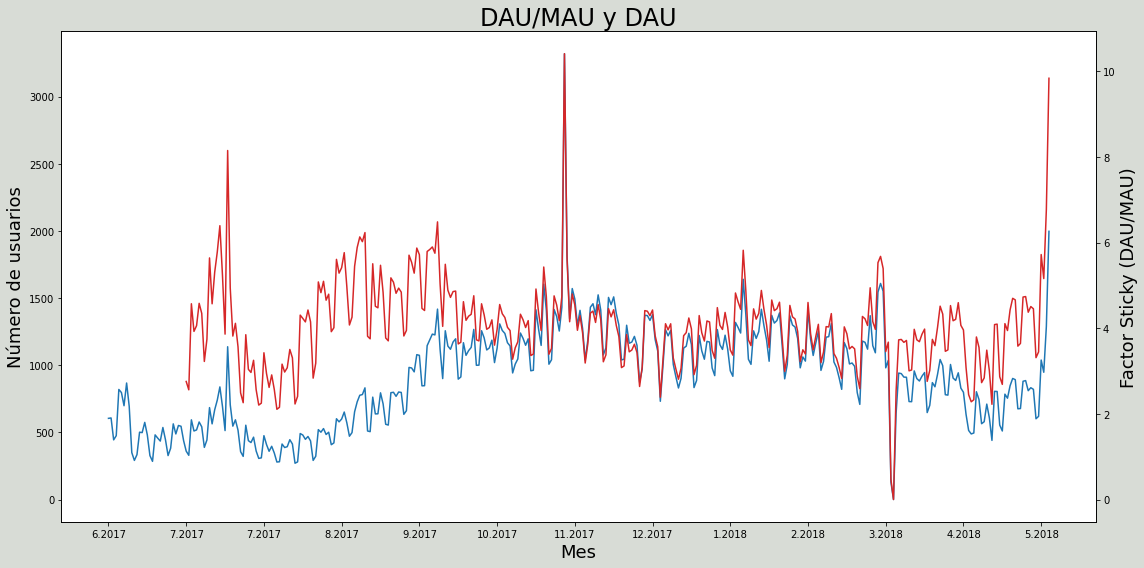

In [26]:
fig, ax1 = plt.subplots(figsize=(16, 8))
color_ax1 = 'tab:blue'
plt.plot(dau_graph['uid'],color = color_ax1)

x_pos = np.arange(len(dau_graph['uid']))
fig.patch.set_facecolor('xkcd:light gray')
plt.xlabel('Mes', fontsize=18)
plt.ylabel('Número de usuarios', fontsize=18)
plt.tick_params(axis='y')
plt.title('DAU/MAU y DAU', fontsize=24)
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax1.xaxis.set_major_locator(loc)

ax2 = ax1.twinx()
color_ax2 = 'tab:red'
ax2.set_ylabel('Factor Sticky (DAU/MAU)',
               fontsize=18)  
ax2.plot(dau_all_term.query('sticky_factor > 0')['sticky_factor'], 
         color = color_ax2)
ax2.tick_params(axis='y')
fig.tight_layout() 
plt.show()

A partir de agosto de 2017, se nota que los usuarios comenzaron a usar este servicio menos seguido. Sin embargo, desde octubre, la tendencia se mantuvo estable, lo que significa que el declive se ha detenido. Además, se observa que en marzo de 2018, el factor sticky comenzó a crecer más rápido que el DAU, lo que fue una buena noticia, ya que indicaba que los usuarios estaban comenzando a usar nuestro servicio con más frecuencia.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, buena comparación. Mi únio comentario es que falta la leyenda del gráfico
</div>

(DAU/MAU y MAU) Segunda Gráfica de todos los plazos

In [27]:
dau_all_term['month']  = dau_all_term['date'].dt.month
dau_all_term['year']   = dau_all_term['date'].dt.year
dau_all_term['month']  = dau_all_term['month'].astype('string')
dau_all_term['year']   = dau_all_term['year'].astype('string')

dau_all_term['xticks'] = dau_all_term['month'] + '.' + dau_all_term['year']
dau_month = dau_all_term.groupby('xticks').agg({'sticky_factor':'mean'})
dau_month = dau_month.reset_index()
mau_graph = mau_graph.merge(dau_month, on = 'xticks')
pattern = mau_graph

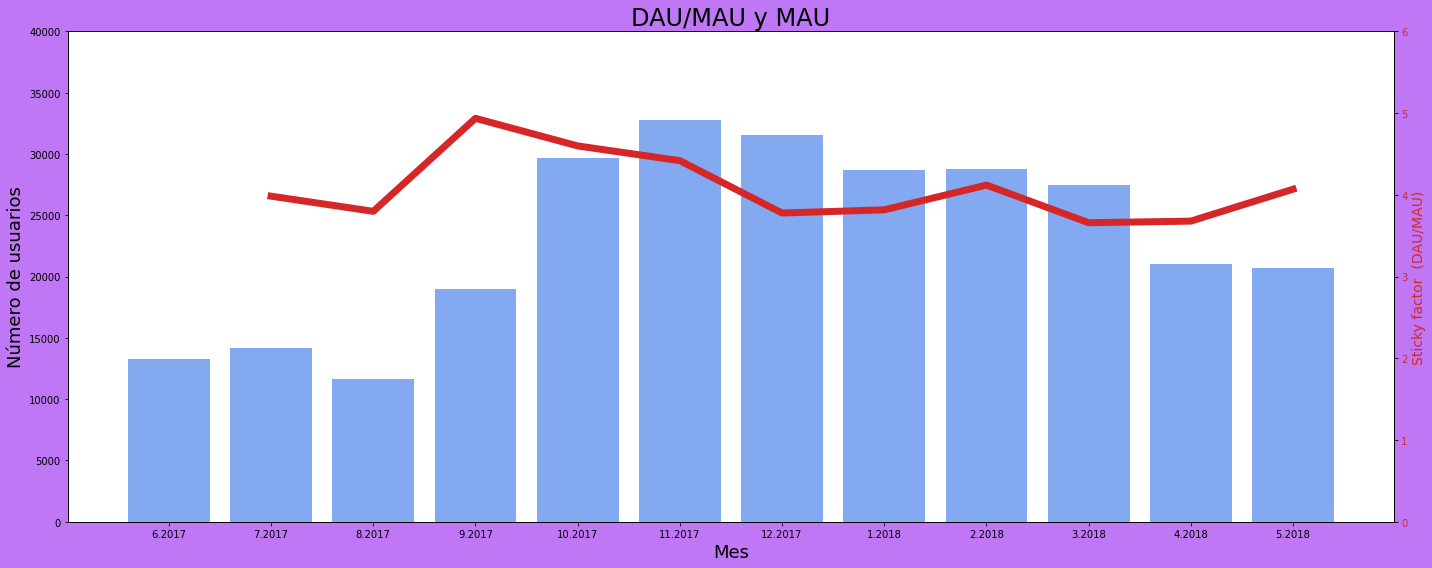

In [28]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)
n = len(mau_graph['xticks'])
ind = np.arange(n) 

fig, ax1 = plt.subplots(figsize=(20, 8))
plt.bar(ind, mau_graph['uid'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:light purple')
plt.xlabel('Mes', fontsize=18)
plt.ylabel('Número de usuarios', fontsize=18)
plt.title('DAU/MAU y MAU', fontsize=24)
plt.xticks(ind, mau_graph['xticks'])
ax1.set_ylim([0, 40000])

  
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sticky factor  (DAU/MAU)', color=color, fontsize=14)
ax2.plot(mau_graph.query('sticky_factor > 0')['sticky_factor'], color=color, linewidth=7.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 6])
fig.tight_layout()
plt.show()

Al principio, puedo apreciar que el sticky factor y el MAU tenían la misma tendencia. Sin embargo, a partir del cuarto mes, el sticky factor comenzó a disminuir, mientras que el MAU se mantuvo estable. Esto significa que el número total de usuarios únicos por mes no cambió, pero el número de usuarios únicos por día comenzó a disminuir. Es muy probable que los usuarios comenzaron a usar nuestro servicio con menos frecuencia. Sin embargo, en enero de 2018, el sticky comenzó a crecer nuevamente, lo que es una buena noticia, ya que indica que los usuarios están comenzando a usar el servicio con más frecuencia.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, se comporta de manera similar al sticky factor diario
</div>

- Número de sesiones por día

In [29]:
sessions_per_day   = visits.groupby(['year','month','day']).agg({'uid':'count'})
sessions_per_day   = sessions_per_day.rename(columns = {'uid':'count_sessions'})
print('Promedio de número de sesiones por día - {:}'.format(int(sessions_per_day.mean())))

Promedio de número de sesiones por día - 987


- Comparación de la dinámica del número total de sesiones diarias con la dinámica de la DAU

In [30]:
sessions_per_day = sessions_per_day.reset_index().reset_index()
dau_graph = dau_graph.reset_index()

In [31]:
dau_graph = dau_graph.merge(sessions_per_day, on = 'index')
dau_graph = dau_graph[['index','xticks','uid','count_sessions']]

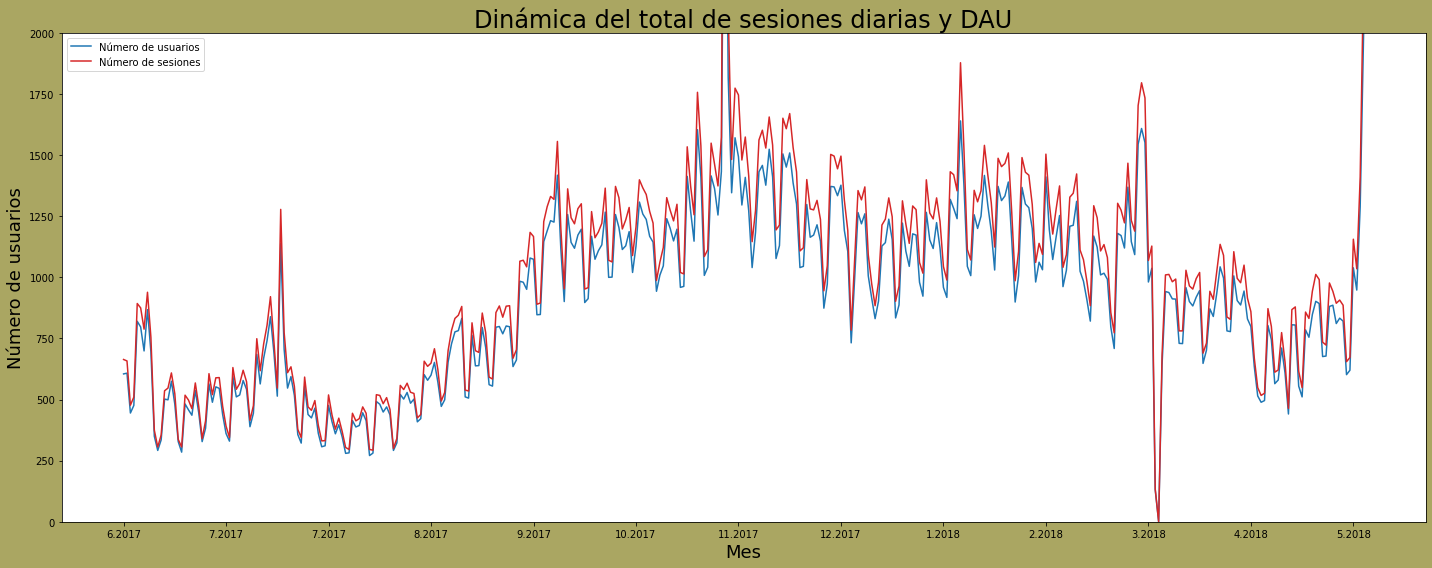

In [32]:
fig, ax1 = plt.subplots(figsize=(20, 8))
color_ax1 = 'tab:blue'
color_ax2 = 'tab:red'
plt.plot(dau_graph['uid'],color = color_ax1)
plt.plot(dau_graph['count_sessions'],color = color_ax2)

x_pos = np.arange(len(dau_graph['uid']))
fig.patch.set_facecolor('xkcd:khaki')
plt.xlabel('Mes', fontsize=18)
plt.ylabel('Número de usuarios', fontsize=18)
plt.tick_params(axis='y')
plt.title('Dinámica del total de sesiones diarias y DAU', fontsize=24)
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax1.xaxis.set_major_locator(loc)
ax1.set_ylim([0, 2000])
plt.legend(["Número de usuarios", "Número de sesiones"])

fig.tight_layout() 
plt.show()

El gráfico del total de sesiones diarias muestra que la mayoría de las personas usan el servicio una vez al día, ya que el gráfico está ligeramente por delante del gráfico de DAU. La diferencia es muy pequeña, lo que significa que muy pocas personas usan el servicio varias veces al día.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Así es, no es tan común usar la página dos veces al día
</div>

- Promedio número de sesiones por usuario

In [33]:
dau_graph['number_sessions_per_user'] = dau_graph['count_sessions']/dau_graph['uid']

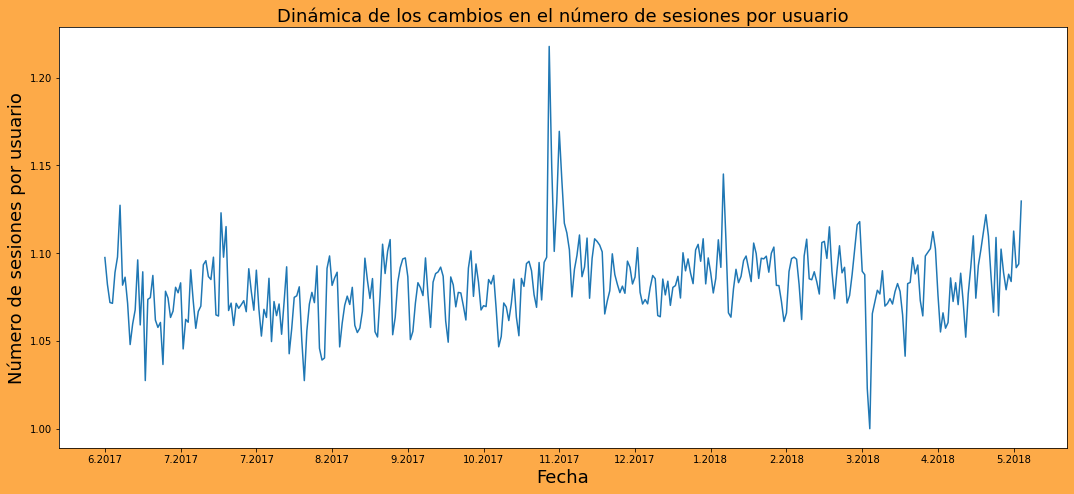

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph['number_sessions_per_user'])
x_pos = np.arange(len(dau_graph['number_sessions_per_user']))
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Número de sesiones por usuario', fontsize=18)
ax.set_title('Dinámica de los cambios en el número de sesiones por usuario', fontsize=18)
fig.patch.set_facecolor('xkcd:light orange')
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)

plt.show()

En promedio, las personas utilizan el servicio entre 1 y 1,15 veces al día. Esto indica que la mayoría de las personas no necesitan usar este servicio varias veces al día.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, se deduce algo similar a lo del gráfico anterior
    
</div>

- Distribución de sesiones por tipo de dispositivo

In [35]:
sessions_touch = ( 
    visits[visits['device'] == 'touch'].
    groupby(['year','month','day']).
    agg({'uid':'count'}).reset_index()
)
sessions_touch   = sessions_touch.rename(columns = {'uid':'count_sessions'})
sessions_desktop = ( 
    visits[visits['device'] == 'desktop'].
    groupby(['year','month','day']).
    agg({'uid':'count'}).reset_index()
)
sessions_desktop  = sessions_desktop.rename(columns = {'uid':'count_sessions'})

In [36]:
def create_column_date(df):
    df['day']    = df['day'].astype('string')
    df['month']  = df['month'].astype('string')
    df['year']   = df['year'].astype('string')
    df['xticks'] = df['month'] + '.' + df['year']
    df['date']   = df['day'] + '.' + df['month'] + '.' + df['year']    
    return df
create_column_date(sessions_desktop)
create_column_date(sessions_touch)
sessions_desktop = sessions_desktop.rename(columns = {'count_sessions':'column_name_desktop'})
sessions_touch   = sessions_touch.rename(columns = {'count_sessions':'column_name_touch'})
sessions_desktop = sessions_desktop.merge(sessions_touch, on = 'date')
sessions_desktop = sessions_desktop[['column_name_desktop','column_name_touch','xticks_x','date']]

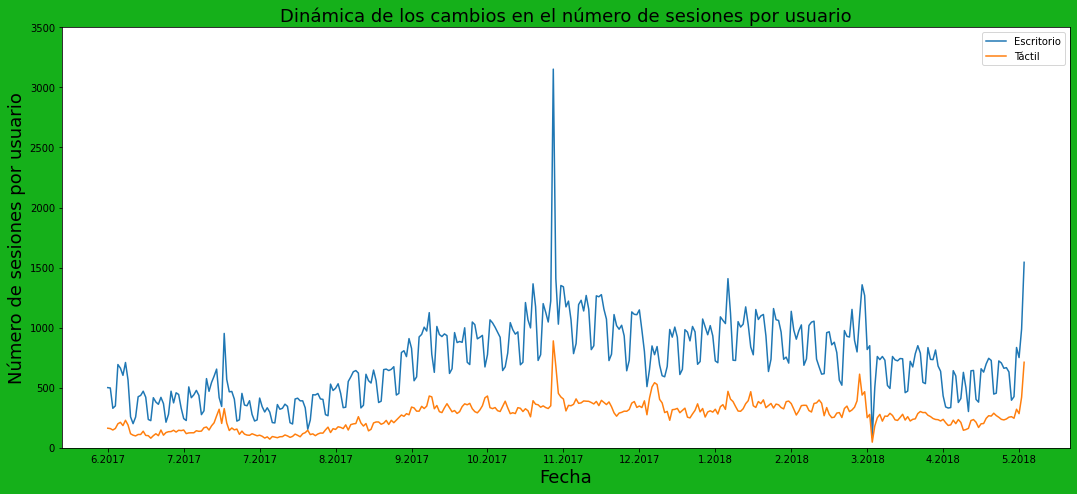

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(sessions_desktop['column_name_desktop'])
ax.plot(sessions_desktop['column_name_touch'])
x_pos = np.arange(len(sessions_desktop['column_name_touch']))
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Número de sesiones por usuario', fontsize=18)
ax.set_title('Dinámica de los cambios en el número de sesiones por usuario', fontsize=18)
fig.patch.set_facecolor('xkcd:green')
plt.xticks(x_pos,sessions_desktop['xticks_x'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)
ax.set_ylim([0, 3500])
plt.legend(["Escritorio", "Táctil"])
plt.show()

Parece ser que la gente usa el servicio unas 3 veces más en computadores que en dispositivos móviles. Los usuarios de móviles también lo usan de forma más uniforme durante la semana, mientras que los usuarios de computadoras lo usan mucho menos los fines de semana. Esto se debe sin duda alguna a que los teléfonos móviles los mantenemos de manera mas cercana, mientras que muchos usuarios solo usan ordenadores en la oficina de trabajo o oficina de casa.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, me parecen acertados los comentarios. Es curioso que hayan tantas sesiones de escritorio, uno esperaría que para el 2018 la cantidad de usuarios móviles sea mayor
    
</div>

- Duración de cada sesión

In [38]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [39]:
visits['session_duration_sec'].describe()

count   359400.00
mean       643.51
std       1016.33
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      84480.00
Name: session_duration_sec, dtype: float64

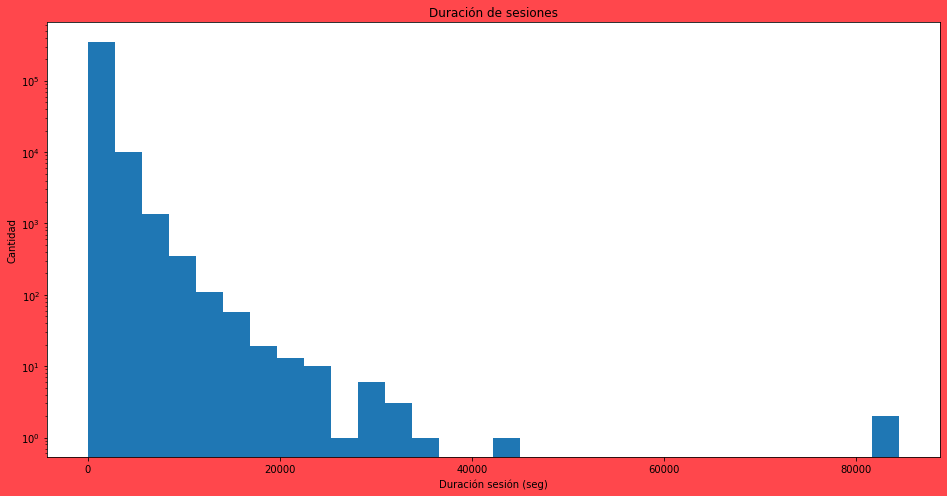

In [40]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('xkcd:light red')
plt.hist(visits['session_duration_sec'], density=False,bins= 30)
plt.title('Duración de sesiones')
plt.ylabel('Cantidad')
plt.xlabel('Duración sesión (seg)')
plt.yscale('log')

Este gráfico no nos da mucha información. Parece que hay algunos valores atípicos que están distorsionando los datos. Voy a eliminarlos y construir un histograma para ver si así puedo obtener una mejor idea de lo que está pasando.

In [41]:
def outliers_lower_upper(name_df,column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)

outliers_duration_sessions = outliers_lower_upper(visits,'session_duration_sec')
print('Duración de sesiones es entre',outliers_duration_sessions)

Duración de sesiones es entre (0, 1920.0)


In [42]:
visits_without_outliers = (
    visits[visits['session_duration_sec'] < outliers_duration_sessions[1]]
)

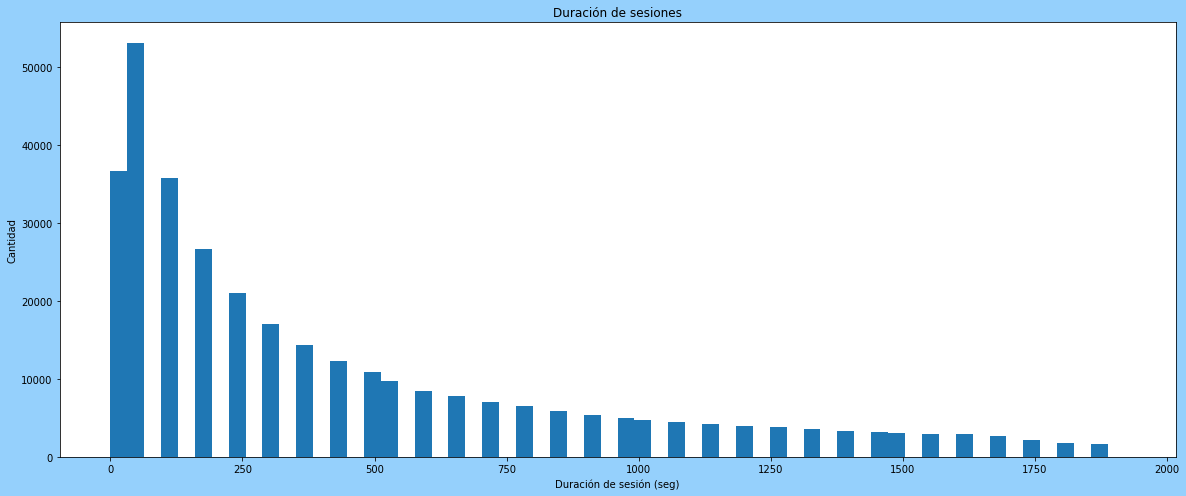

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:light blue')
plt.hist(visits_without_outliers['session_duration_sec'],
         density=False,
         bins= 60,
         range=(0,1920))
plt.title('Duración de sesiones')
plt.ylabel('Cantidad')
plt.xlabel('Duración de sesión (seg)')
plt.show()

Parece ser que la distribución es normal, así que podré usar la mediana para encontrar la duración promedio de la sesión.

In [44]:
visit_avg_lenght = visits_without_outliers['session_duration_sec'].mean()
print('La duración media de una sesión es de {:.0f} segundos.'.format(visit_avg_lenght))
asl = visits['session_duration_sec'].mode()
duration_zerro = len(visits_without_outliers.query('session_duration_sec == 0'))
print('En la mayoría de los casos, la sesión duró ',asl[0],' segundos.')
print(duration_zerro, ' sesiones de 0 segundos.')

La duración media de una sesión es de 438 segundos.
En la mayoría de los casos, la sesión duró  60  segundos.
35794  sesiones de 0 segundos.


- La duración promedio de una sesión es de un poco más de 7 minutos (438 segundos). Sin embargo, la mayoría de las sesiones duraron 1 minuto.

- Hay 35794 sesiones con una duración de 0 segundos, lo que significa que se produjo un error de conexión y el usuario no pudo utilizar el servicio. Este error pudo ocurrir del lado del usuario ya sea por el dispositivo o el internet o de nuestro lado, porque el servidor no estaba funcionando.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto    
</div>

#### Dinámica de los cambios en la duración de la sesión.

In [45]:
duration = ( 
    visits_without_outliers.
    groupby(['year','month','day']).
    agg({'session_duration_sec':'mean'}).reset_index()
)
duration['month']  = duration['month'].astype('string')
duration['year']   = duration['year'].astype('string')
duration['xticks'] = duration['month'] + '.' + duration['year']

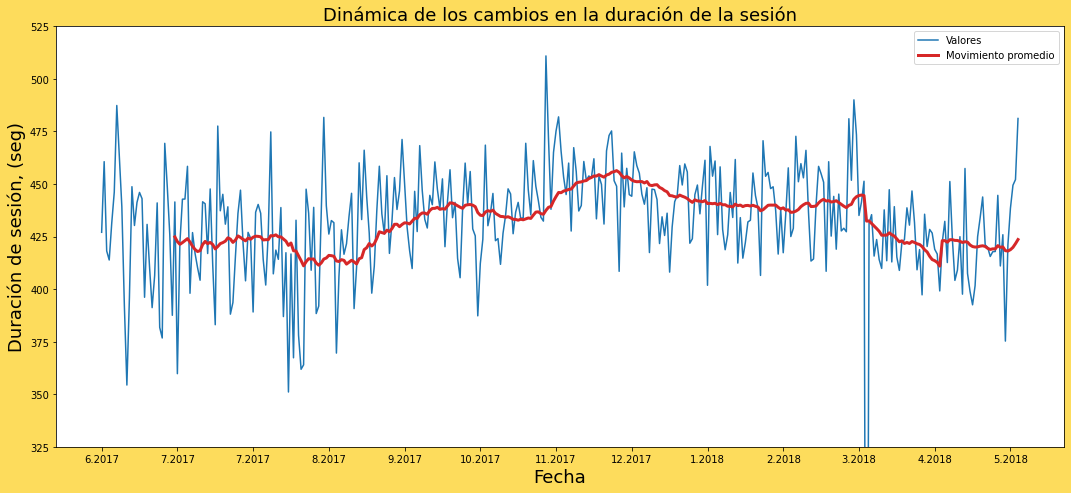

In [46]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(duration['session_duration_sec'])
x_pos = np.arange(len(duration['session_duration_sec']))
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Duración de sesión, (seg)', fontsize=18)
ax.set_title('Dinámica de los cambios en la duración de la sesión', fontsize=18)
fig.patch.set_facecolor('xkcd:light gold')
plt.xticks(x_pos,duration['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)
ax.set_ylim([325, 525])

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

NAvg = 30
XAvg = np.array(x_pos[NAvg - 1:])
YAvg = moving_average(duration['session_duration_sec'], NAvg)
ax.plot(XAvg,YAvg, color=color, linewidth=3.0)
plt.legend(["Valores", "Movimiento promedio"])

plt.show()

La duración de la sesión aumentó gradualmente desde agosto hasta diciembre. Tal vez esto se deba a que había más ofertas y el usuario necesitaba más tiempo para elegir lo que quería pedir. Ya que desde diciembre, la duración de la sesión ha disminuido gradualmente (ya no era temporada de ofertas probablemente).

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con los gráficos, muy útil observar la media móvil. Respecto a su variación, sería útil observarlo a la para con las ventas, pero la hipótesis que planteas me parece bien.
    
</div>

#### ¿Con qué frecuencia vuelven los usuarios?

- Tengo que encontrar la fecha de la primera visita del usuario

In [47]:
visits_retention  = visits
def find_first_session(df, name_column, activity_type = 'first_session'):
    visits_first = df.groupby(['uid']).agg({name_column:'min'})
    visits_first = visits_first.rename(columns = {name_column:activity_type})
    df = df.merge(visits_first, on = 'uid')   
    df[activity_type] = df[activity_type].dt.floor('1D')
    return df

Tengo que encontrar el primer día del mes en que tuvo lugar el primer contacto y luego buscar el primer día del mes en el que tuvo lugar el contacto actual

In [48]:
def find_beginning_of_month_session(df):
    df = find_first_session(df,'date')
    df['first_session'] = (
        pd.to_datetime(df['first_session'], unit='d') 
        -
        pd.to_timedelta(df['first_session'].dt.day - 1, unit='d') 
    )
    df['active_session'] = (
        pd.to_datetime(df['date'], unit='d') 
        -
        pd.to_timedelta(df['date'].dt.day - 1, unit='d') 
    )
    return df

visits_retention = find_beginning_of_month_session(visits_retention)

Calcularé cuántos meses han pasado entre el contacto actual y el primero y luego contaré cada mes el número de usuarios únicos de cada cohorte, para luego poder contar la tasa de retención. Toda esta información/datos los agruparé para visualizarlos de mejor manera en un mapa de calor.

In [49]:
def calculate_cohort_lifetime(df):
    df['cohort_lifetime'] = (
        round(((df['active_session'] - df['first_session']) / 
               np.timedelta64(1,'M'))).astype(int)
    )

    cohorts = (
        df.groupby(['first_session','cohort_lifetime']).
        agg({'uid':'nunique'}).
        reset_index()
    )
    unique_users_first_month = cohorts[cohorts['cohort_lifetime'] == 0]
    unique_users_first_month = ( 
        unique_users_first_month.
        rename(columns = {'uid':'cohort_0',
                          'cohort_lifetime':'cl2'})
    )
    cohorts = cohorts.merge(unique_users_first_month, on = 'first_session')
    
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_0']
    cohorts['first_month_str']= cohorts['first_session'].dt.strftime('%Y.%m')

    cohorts_pivot_table = (
        cohorts.
        pivot_table(index='first_month_str',
                    columns='cohort_lifetime',
                    values='retention',
                    aggfunc='sum')
    )
    return cohorts_pivot_table

cohorts_pivot_table = calculate_cohort_lifetime(visits_retention)

Text(0.5, 51.0, 'Lifetime')

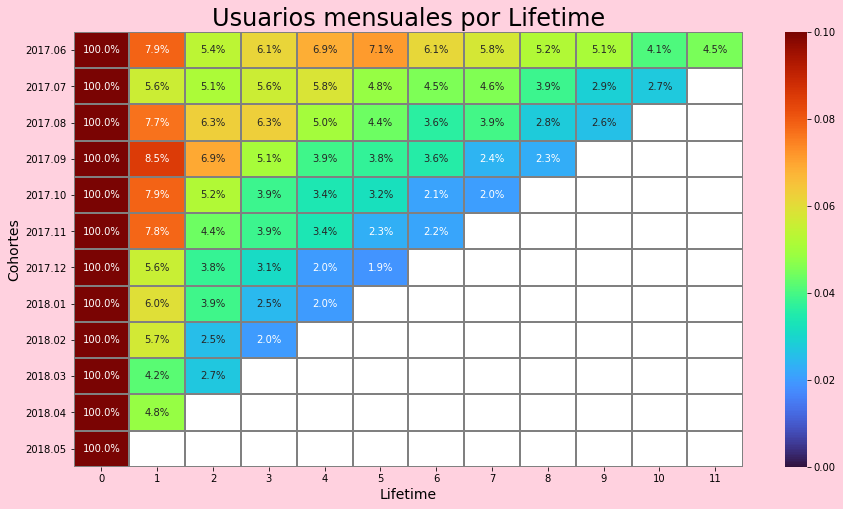

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:light pink')
plt.title('Usuarios mensuales por Lifetime', fontsize=24)
    
sns.heatmap(cohorts_pivot_table, 
            annot= True,
            fmt = '.1%',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 0.1,
            cmap = 'turbo' 
           )
ax.set_ylabel('Cohortes', fontsize=14)    
ax.set_xlabel('Lifetime', fontsize=14)

Menos del 9% aprox de los usuarios vuelven a utilizar el servicio el mes siguiente. Y cada mes el número de usuarios disminuye. Esto significa que se gasta dinero en atraer clientes, pero después de la primera experiencia de cooperación, la mayoría de los clientes no vuelven a contactarnos. Tenemos que averiguar por qué los usuarios están insatisfechos y arreglarlo. Es mucho más barato retener a un cliente que atraer uno nuevo. A continuación, voy a calcular cuántos usuarios nos han contactado más de una vez.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, buen trabajo! Mi único comentario es que para el mapa de calor creo que es mejor tener dos colores y que las casillas vayan de un color a otro, así es más natural ver cuál es mayor o menor. A mi parecer, como hay muchos colores, no se entiende de inmediato cuál es mayor y cuál es menor o si aumento o disminuye una cohorte en el tiempo.
    
</div>

In [51]:
visits_retention_touch    = visits[visits['device'] == 'touch']
visits_retention_desktop  = visits[visits['device'] == 'desktop']

visits_retention_touch      = find_beginning_of_month_session(visits_retention_touch)
cohorts_pivot_table_touch   = calculate_cohort_lifetime(visits_retention_touch)

visits_retention_desktop    = find_beginning_of_month_session(visits_retention_desktop)
cohorts_pivot_table_desktop = calculate_cohort_lifetime(visits_retention_desktop)

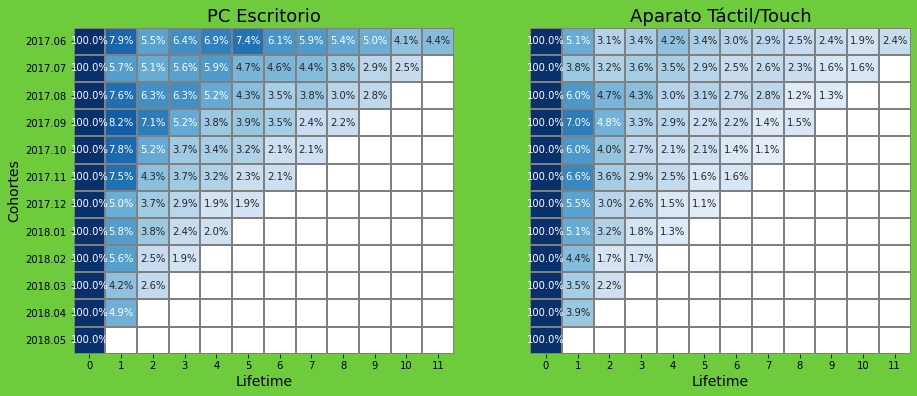

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:apple')
ax1 = plt.subplot(121)
res = sns.heatmap(cohorts_pivot_table_desktop, 
                  annot= True,
                  fmt = '.1%',
                  linewidths = 1,
                  linecolor = 'grey',
                  vmin = 0,
                  vmax = 0.1,
                  cmap = 'Blues',
                  cbar = False
                 )
ax1.set_ylabel('Cohortes', fontsize=14)       
ax1.set_xlabel('Lifetime', fontsize=14)
ax1.set_title('PC Escritorio', fontsize=18)
    
ax2 = plt.subplot(122)
res = sns.heatmap(cohorts_pivot_table_touch, 
                  annot= True,
                  fmt = '.1%',
                  linewidths = 1,
                  linecolor = 'grey',
                  vmin = 0,
                  vmax = 0.1, 
                  cmap = 'Blues',
                  yticklabels = False, 
                  xticklabels = True,
                  cbar = False
                 )

ax2.set_ylabel('')  
ax2.set_xlabel('Lifetime', fontsize=14)
ax2.set_title('Aparato Táctil/Touch', fontsize=18)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! Aquí es más legible la evolución de las cohortes ya que el color azul se va volviendo más claro.
    
</div>

Parece ser que los usuarios que usan la versión de escritorio son más propensos a volver a utilizar el servicio. Tal vez porque la versión táctil o móvil tenga fallas que necesitan ser mejoradas.

- Porcentaje de usuarios han utilizado el servicio más de una vez.

In [53]:
uniq_user = len(visits.groupby('uid').agg({'uid':'nunique'}))

count_user = visits.groupby('uid').agg({'uid':'count'})
only_ones_visit = len(count_user[count_user['uid'] == 1])
print('Total: {:} usuarios únicos.'.format(uniq_user))
print('{:} clientes han utilizado más de una vez.'.format(uniq_user - only_ones_visit,
                                                        (uniq_user - only_ones_visit)/uniq_user))

Total: 228169 usuarios únicos.
52128 clientes han utilizado más de una vez.


- Alrededor del 22.8% de los clientes han utilizado el servicio más de una vez.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
    
</div>

### Ventas
#### ¿Cuánto tiempo pasa entre la primera visita y la primera compra?

In [54]:
orders_first = orders.groupby('uid').agg({'buy_ts':'min'})
orders_first = orders_first.rename(columns = {'buy_ts':'first_order'})
orders_first['first_order'] = orders_first['first_order'].dt.floor('1D')

In [55]:
visits_conversion = visits[['device','uid','date','source_id']]
visits_conversion = visits_conversion.sort_values(by = 'date')

visits_conversion  =  (
    visits_conversion.
    groupby('uid').
    agg({'date':'min','device':'first','source_id':'first'}) 
)
visits_conversion = visits_conversion.rename(columns = {'date':'first_session'})

In [56]:
conversion_first = orders_first.merge(visits_conversion, on= 'uid', how = 'left')

In [57]:
conversion_first['term'] = (
    ((conversion_first['first_order'] - conversion_first['first_session']) 
    / np.timedelta64(1,'D')).astype('int')
)

- Promedio de conversión

In [58]:
avg_conversion = conversion_first['term'].mean()
print('Promedio de conversión es de {:.1f} días.'.format(avg_conversion))

Promedio de conversión es de 16.9 días.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
    
</div>

- Distribución de conversiones por fuentes

In [59]:
conversion_by_source = conversion_first.groupby('source_id').agg({'term':['mean','count']}).reset_index()
conversion_by_source.columns = ['source_id','mean','count']
conversion_by_source['ratio_count'] = ( 
    conversion_by_source['count'] / conversion_by_source['count'].sum()*100    
)
def create_label(item):
    text = 'Source ' + str(int(item['source_id']))
    return text
conversion_by_source['label'] = conversion_by_source.apply(create_label,axis=1)

In [60]:
conversion_by_source = conversion_by_source[conversion_by_source['mean'] != 0].reset_index()

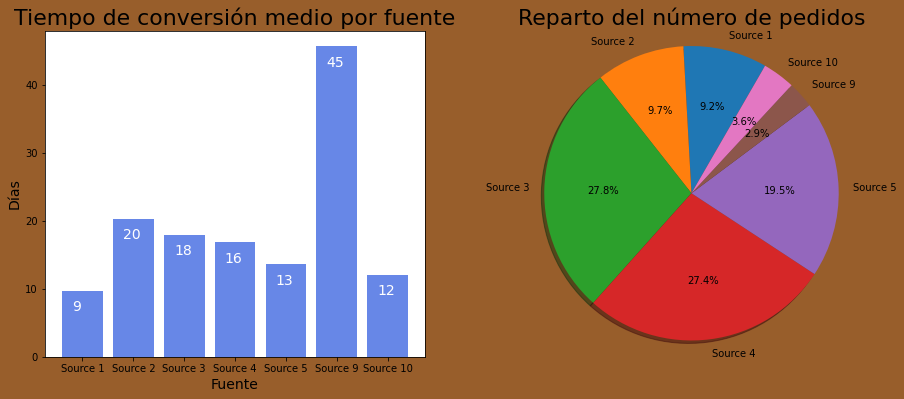

In [61]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:sepia')
ax1 = plt.subplot(121)

n = len(conversion_by_source['label'])
ind = np.arange(n) 

res = plt.bar(ind, conversion_by_source['mean'],
        align='center',
        alpha=0.8, 
        color='royalblue')

plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Días', fontsize=14)
plt.title('Tiempo de conversión medio por fuente', fontsize=22)
plt.xticks(ind, conversion_by_source['label'])
for idx,i in enumerate(ax1.patches):
    ax1.text(i.get_x() + .2, 
             i.get_height() - 3, 
             int(conversion_by_source['mean'][idx]), 
             fontsize=14,color='white')
   
ax2 = plt.subplot(122)
res = ax2.pie(conversion_by_source['ratio_count'],
        labels  = conversion_by_source['label'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 60)
ax2.axis('equal')
ax2.set_title('Reparto del número de pedidos', fontsize=22)

plt.show()

Puedo ver que ninguna de las fuentes 6, 7 u 8 generó pedidos. La fuente 9 tiene un tiempo de conversión muy largo, por lo que es posible que solo el 2,9% de los pedidos provengan de ella. Las fuentes más populares son la 3 y 4, con tiempos de conversión de entre 18 y 16 días, respectivamente. La fuente con el mejor tiempo de conversión es la # 1 sin duda.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy buen análisis, definitivamente tener la visión de las diferencias por fuente es muy útil.
    
</div>

- Distribución de conversiones por periodo

In [62]:
def type_conversion(term):
    if term == 0:
        return 'Conversion 0d'
    if term <=7:
        return 'Conversion 7d'
    if term <=14:
        return 'Conversion 14d'
    if term <=30:
        return 'Conversion 30d'
    else:
        return 'Conversion >30d'

In [63]:
conversion_first['type_conversion'] = conversion_first['term'].apply(type_conversion)
conversion_shares = conversion_first.groupby('type_conversion').agg({'type_conversion':'count'})
conversion_shares = conversion_shares.rename(columns = {'type_conversion':'count'})
conversion_shares = conversion_shares.reset_index()
conversion_shares['ratio'] = conversion_shares['count']/conversion_shares['count'].sum()*100

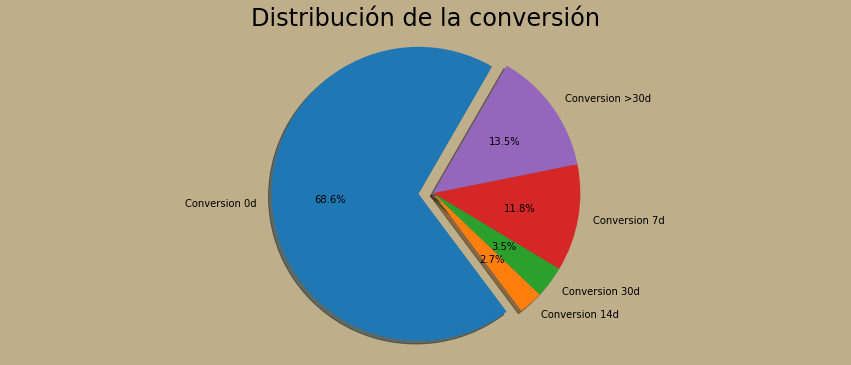

In [64]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:putty')
explode = (0.1, 0, 0, 0, 0)
ax1.pie(conversion_shares['ratio'],
        explode = explode ,
        labels  = conversion_shares['type_conversion'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 60)
ax1.axis('equal')
ax1.set_title('Distribución de la conversión', fontsize=24)
plt.show()

La mayoría de los pedidos (68%) se realizan el mismo día en que los usuarios visitan el sitio por primera vez. Un poco más de la décima parte de los usuarios (11,8%) realiza el pedido dentro de la semana siguiente a la primera visita. Y alcanzo a ver que un poco más del 13% de los usuarios realiza su primer pedido al menos un mes después de la primera visita.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
    
</div>

- Distribución de conversiones por dispositivos

In [65]:
conversion_by_device = conversion_first.groupby('device').agg({'term':['mean','count']}).reset_index()
conversion_by_device.columns = ['device','mean','count']
conversion_by_device['ratio_count'] = ( 
    conversion_by_device['count'] / conversion_by_device['count'].sum()*100    
)
conversion_by_device

,device,mean,count,ratio_count
0,desktop,15.97,29274,80.15
1,touch,20.65,7249,19.85


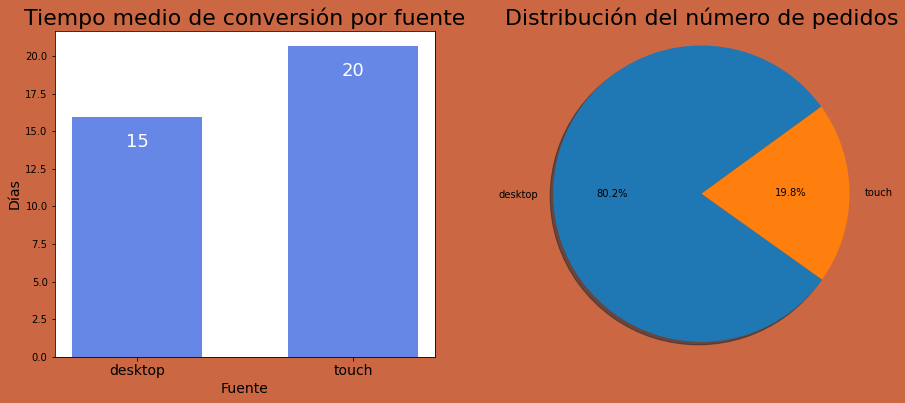

In [66]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:terracota')
ax1 = plt.subplot(121)

n = len(conversion_by_device['device'])
ind = np.arange(n) 
bar_width = 0.6
res = plt.bar(ind, conversion_by_device['mean'],bar_width,
        align='center',
        alpha=0.8, 
        color='royalblue')

plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Días', fontsize=14)
plt.title('Tiempo medio de conversión por fuente', fontsize=22)
plt.xticks(ind, conversion_by_device['device'], fontsize=14)
for idx,i in enumerate(ax1.patches):
    ax1.text(i.get_x() + .25, 
             i.get_height() - 2, 
             int(conversion_by_device['mean'][idx]), 
             fontsize=18,color='white')
   
ax2 = plt.subplot(122)
res = ax2.pie(conversion_by_device['ratio_count'],
        labels  = conversion_by_device['device'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 36)
ax2.axis('equal') 
ax2.set_title('Distribución del número de pedidos', fontsize=22)

plt.show()

La mayoría de los pedidos (más del 80%) se realizan desde ordenadores de escritorio/PC. Los pedidos realizados desde ordenadores de escritorio se convierten en ventas de manera más rápida (15 días aprox) que los pedidos realizados desde dispositivos táctiles (20 días aprox). El gráfico circular muestra la distribución de los pedidos entre los dispositivos en el primer pedido. 

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
    
</div>

#### Número de ordenes por cada periodo de tiempo

- Distribución diaria de ordenes por su fuente

In [67]:
orders_all = orders.merge(visits_conversion, on= 'uid', how = 'left')
orders_all['actual_date'] = orders_all['buy_ts'].dt.floor('1D')

orders_per_day = ( 
    orders_all.
    groupby(['actual_date','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_day = orders_per_day.rename(columns = {'device':'count_orders'})
orders_per_day['label'] = orders_per_day.apply(create_label,axis=1)
source_dict  = orders_per_day.sort_values(by='source_id')['label'].unique().tolist()

In [68]:
def create_df_for_plot(type_source):
    df_source = (
        orders_per_day.query('label == @type_source')
        .pivot_table(index = 'actual_date',
                     values ='count_orders',
                     aggfunc ='sum')
    )
    return df_source

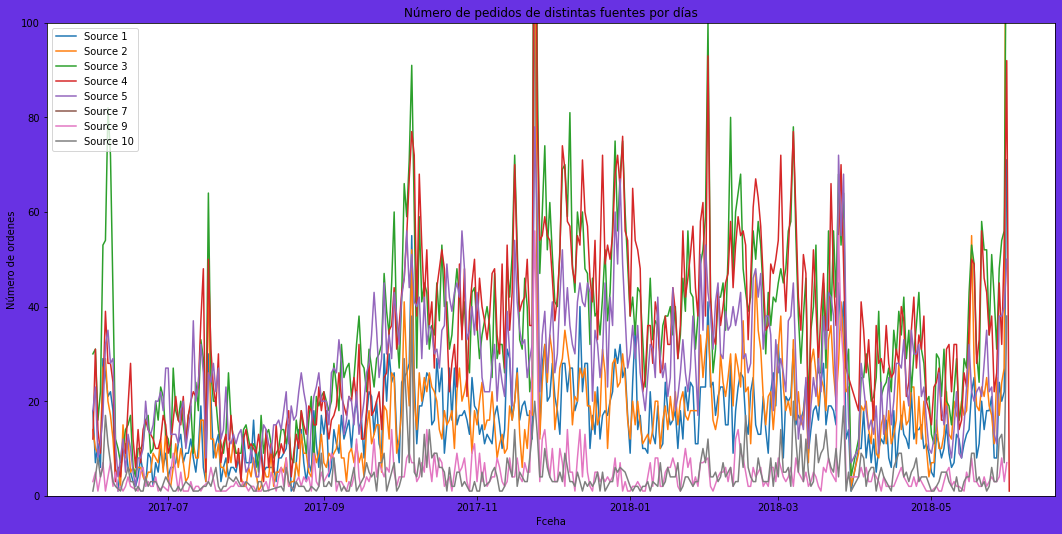

In [69]:
fig, ax = plt.subplots(figsize=(20, 9))
fig.subplots_adjust(bottom=0.15, left=0.2)
for item in source_dict:
     ax.plot(create_df_for_plot(item))

ax.set_xlabel('Fceha')
ax.set_ylabel('Número de ordenes')
plt.legend(source_dict)
ax.set_title('Número de pedidos de distintas fuentes por días')
ax.set_ylim([0, 100])
fig.patch.set_facecolor('xkcd:burple')

plt.show()

El gráfico tiene demasiada información y es difícil de entender. Por lo que mejor voy a construir una gráfica basada en el número de pedidos por semana para tener una visión más general y clara de todos estos datos.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Sí, es mejor analizarlo de otra manera
    
</div>

- Distribución semanal de ordenes por su fuente

In [70]:
orders_all['first_day_of_week'] = (
    pd.to_datetime(orders_all['actual_date'], unit='d') 
    -
    pd.to_timedelta(orders_all['actual_date'].dt.dayofweek, unit='d') 
)

In [71]:
orders_per_week = ( 
    orders_all.
    groupby(['first_day_of_week','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_week['label'] = orders_per_week.apply(create_label,axis=1)
orders_per_week = orders_per_week.rename(columns = {'device':'count_orders'})

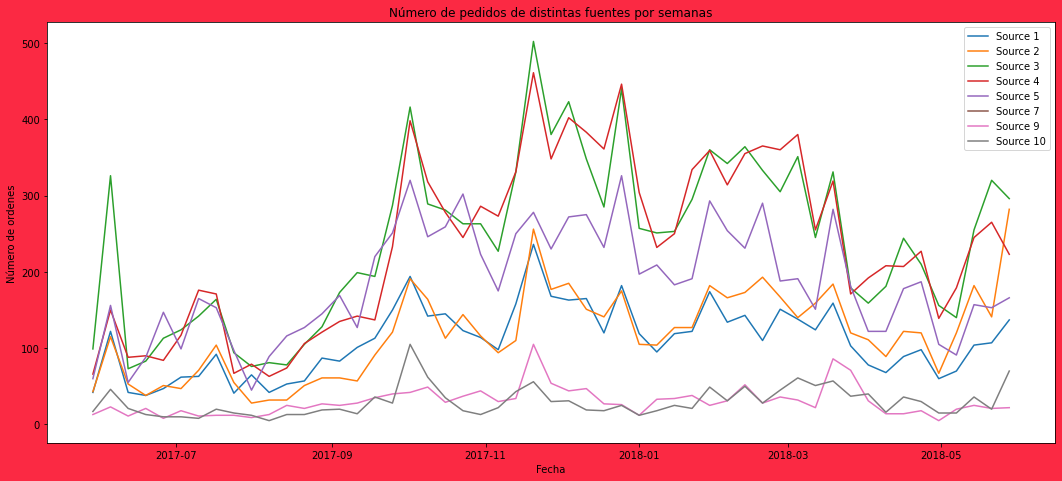

In [72]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
for type_source in source_dict:
     ax.plot(orders_per_week.query('label == @type_source')
             .pivot_table(index = 'first_day_of_week',
                          values ='count_orders',
                          aggfunc ='sum'))
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de ordenes')
plt.legend(source_dict)
ax.set_title('Número de pedidos de distintas fuentes por semanas')
fig.patch.set_facecolor('xkcd:strawberry')

plt.show()

Puedo ver que en agosto de 2017, todas las fuentes de pedidos tenían aproximadamente la misma cantidad de pedidos. Sin embargo, a partir de ese mes, el número de pedidos de las fuentes 3, 4, 5, 2 y 1 comenzaron a aumentar, especialmente las de las fuentes 3 y 4. Por otro lado, las fuentes 9 y 10 se nota que constantemente tuvieron un número bajo de pedidos.

- Distribución del número de pedidos por cohortes

In [73]:
orders_all['first_day_of_month_first_session'] = (
    pd.to_datetime(orders_all['first_session'], unit='d') 
    -
    pd.to_timedelta(orders_all['first_session'].dt.day-1, unit='d') 
)
orders_per_cohort = ( 
    orders_all.
    groupby(['first_day_of_month_first_session','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_cohort['label'] = orders_per_cohort.apply(create_label,axis=1)
orders_per_cohort = orders_per_cohort.rename(columns = {'device':'count_orders'})

In [74]:
orders_cohort_all = orders_per_cohort.groupby('first_day_of_month_first_session').agg({'count_orders':'sum'})
orders_cohort_all = orders_cohort_all.rename(columns = {'count_orders':'count_orders_all'})
orders_per_cohort = orders_per_cohort.merge(orders_cohort_all, 
                                            on = 'first_day_of_month_first_session')
orders_per_cohort['ratio'] = ( 
    orders_per_cohort['count_orders']/orders_per_cohort['count_orders_all']
)

Tuve que encontrar el primer día del mes (del total de órdenes) y calcular el número de pedidos de ese mes, para luego poder hallar la proporción de pedidos de cada fuente en cada cohorte.

In [75]:
orders_per_cohort = ( 
    orders_per_cohort[(orders_per_cohort['label'] != 'Source 7') 
    &
    (orders_per_cohort['first_day_of_month_first_session'] != '2018-06-01')]
)

orders_per_cohort['first_day_of_month_first_session'] = ( 
    orders_per_cohort['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

orders_per_cohort_pivot_table = orders_per_cohort.pivot_table(index = 'first_day_of_month_first_session', 
                                                              columns = 'label', 
                                                              values = 'ratio', 
                                                              aggfunc = 'max')

Remuevo anomalías que me impidan tener datos correctos

Text(0.5, 51.0, 'Fuente')

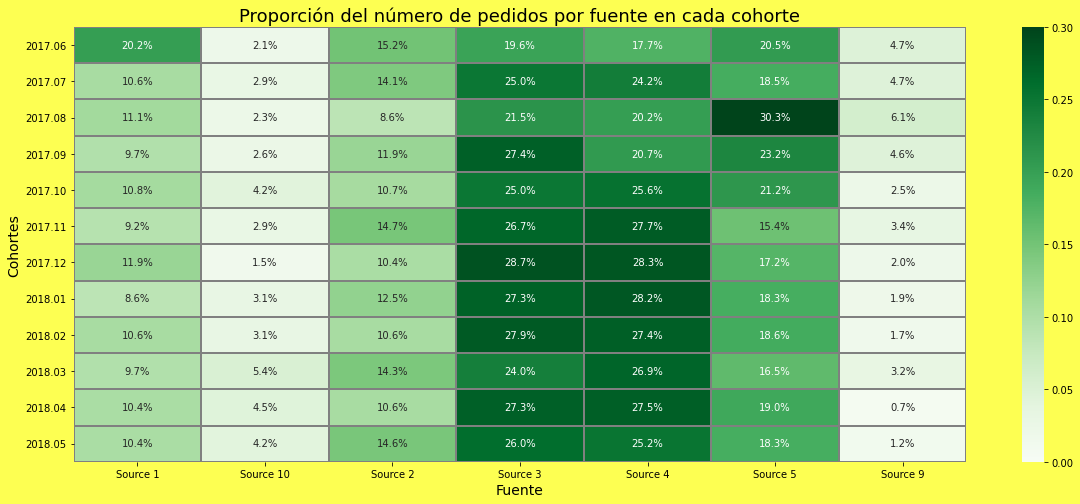

In [76]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:lemon')
plt.title('Proporción del número de pedidos por fuente en cada cohorte', fontsize=18)
    
sns.heatmap(orders_per_cohort_pivot_table, 
            annot= True,
            fmt = '.1%',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 0.3,
            cmap = 'Greens',
            yticklabels = True,
           )
ax.set_ylabel('Cohortes', fontsize=14)   
ax.set_xlabel('Fuente', fontsize=14)

La proporción de pedidos de cada fuente es similar en todas las cohortes, excepto en algunos casos. Por ejemplo, la fuente # 1 tiene una proporción 2 veces mayor en la primera cohorte que en las demás, y la fuente # 5 tiene una proporción notablemente mayor en la tercera cohorte que en las demás. En general, puedo concluir que las proporciones de las fuentes cambian ligeramente, pero no es mucho.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy interesante, este mapa de calor indica que las preferencias por fuentes se han mantenido desde octubre    
    
Muy creativa la forma de mostrar estos datos, lo más típico es observar el promedio de ordenes por usuario para cada cohorte a lo largo del tiempo. 

Entiendo que para hacer la división por fuentes tomes como cohortes las primeras visitas, pero normalmente se mira el mes de primera orden para cohortes en análisis referentes a los pedidos. En este caso puedes hacerlo así, pero podrías asumir que la fuente de la primera compra es la fuente de la primera visita.    
    
</div>

#### Tamaño de compra promedio

In [77]:
revenue_per_day = ( 
    orders_all.
    groupby(['actual_date']).
    agg({'revenue':'mean'})
)

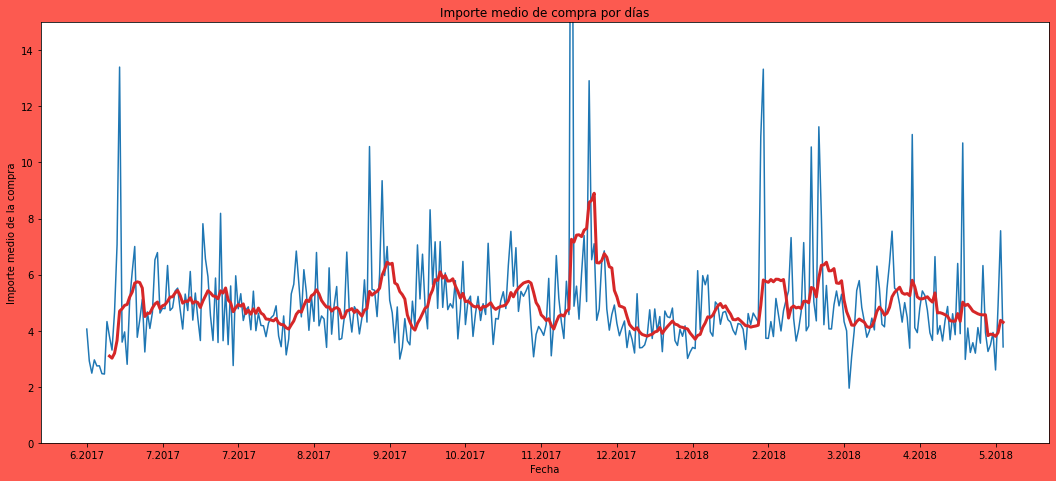

In [78]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
x_pos = np.arange(len(revenue_per_day))
XAvg = np.array(x_pos)
ax.plot(XAvg,revenue_per_day['revenue'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Importe medio de la compra')
ax.set_title('Importe medio de compra por días')
ax.set_ylim([0, 15])
fig.patch.set_facecolor('xkcd:coral')

plt.xticks(x_pos,duration['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)

NAvg = 10
XAvg = np.array(x_pos[NAvg - 1:])
YAvg = moving_average(revenue_per_day['revenue'], NAvg)
ax.plot(XAvg,YAvg, color=color, linewidth=3.0)

plt.show()

El precio medio de compra oscila entre 4 y 6, con una fuerte subida en diciembre de 2017 hasta 9.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
    
</div>

- Tamaño medio de la compra por fuente

In [79]:
revenue_source = ( 
    orders_all.
    groupby(['source_id'],as_index=False).
    agg({'revenue':'mean'})
)
revenue_source['label'] = revenue_source.apply(create_label,axis=1)

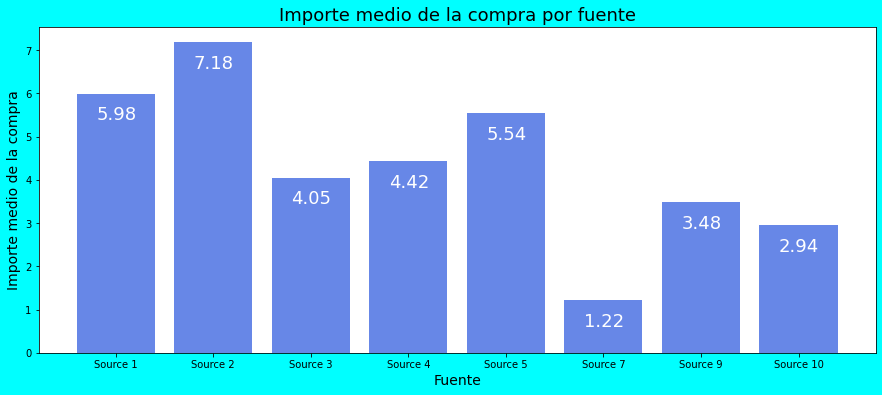

In [80]:
n = len(revenue_source['label'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, revenue_source['revenue'],
        align='center',
        alpha=0.8, 
        color='royalblue')

fig.patch.set_facecolor('xkcd:cyan')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Importe medio de la compra', fontsize=14)
plt.title('Importe medio de la compra por fuente', fontsize=18)
plt.xticks(ind, revenue_source['label'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.2, 
            i.get_height()-0.6, 
            float(int(revenue_source['revenue'][idx]*100)/100), 
            fontsize=18,color='white')
plt.show()

Las fuentes # 2, # 1 y # 5 generan los mayores ingresos medios. Las fuentes más populares (3 y 4) generan ingresos medios más bajos.

- Tamaño medio de la compra por cohorte

In [81]:
orders_all['first_day_of_month_str'] = ( 
    orders_all['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

revenue_cohort = ( 
    orders_all.query('first_day_of_month_str != "2018.06"').
    groupby(['first_day_of_month_str']).
    agg({'revenue':'mean'})
)

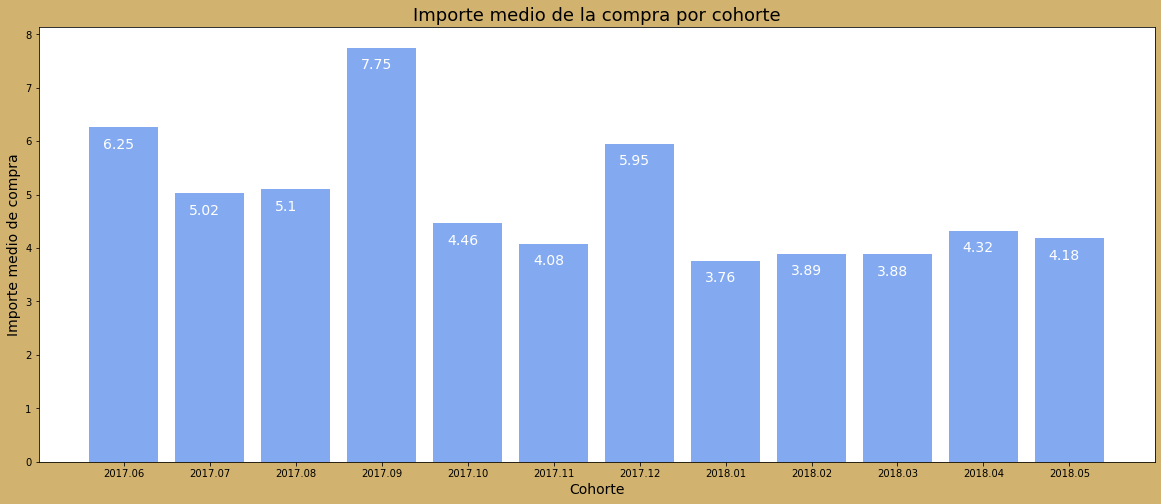

In [82]:
n = len(revenue_cohort['revenue'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, revenue_cohort['revenue'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:tan')
plt.xlabel('Cohorte', fontsize=14)
plt.ylabel('Importe medio de compra', fontsize=14)
plt.title('Importe medio de la compra por cohorte', fontsize=18)
plt.xticks(ind, revenue_cohort.index.values)
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.16, 
            i.get_height()-0.4, 
            float(int(revenue_cohort['revenue'][idx]*100)/100), 
            fontsize=14,color='white')
plt.show()

El tamaño promedio de compra varía entre 4.06 y 5.85. En septiembre del 2017 se obtuvieron la mayor cantidad de  pedidos y el precio de compra promedio más alto.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

#### ¿Cuánto beneficio aporta un cliente?

- Rentabilidad media por cliente.

In [83]:
ltv = orders_all.groupby('uid').agg({'revenue':'sum'})
ltv_avg = ltv.sum()[0] / len(ltv) 
print('Rentabilidad media por cliente: ${:.1f}'.format(ltv_avg))

Rentabilidad media por cliente: $6.9


- Rentabilidad media por cliente, por fuente.

In [84]:
orders_all = orders_all.sort_values(by = 'buy_ts')
source_first = orders_all.groupby('uid').agg({'source_id':'first'})
source_first = source_first.rename(columns = {'source_id':'source_id_first'})
orders_all = orders_all.merge(source_first, on = 'uid')

In [85]:
ltv_source_all = orders_all.groupby(['uid','source_id_first']).agg({'revenue':'sum'})
ltv_source = ( 
    ltv_source_all.
    groupby('source_id_first').
    agg({'revenue':['sum','count']})
    .reset_index()
)
ltv_source.columns = ['source_id','sum','count']
ltv_source['ltv_customer'] = ltv_source['sum'] / ltv_source['count']
ltv_source['label'] = ltv_source.apply(create_label,axis=1)
ltv_source = ltv_source[ltv_source['label'] != 'Source 7'].reset_index()

<div class="alert alert-block alert-info">
<b>Lo que he querido medior es la rentabilidad/profit media por cliente por su fuente, entonces primero determiné la fuente de cada visita y luego saqué el cálculo del LTV por fuente según la cantidad de registros, que son aprox 36,523.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Tengo mis dudas respecto a lo que se quiere medir aquí, el ltv por usuario debería medirse con el revenue dividido la cantidad de usuarios únicos que partieron en cada source, en este caso estás dividiendo el revenue por la cantidad de compras realizadas por usuarios que partieron en cada source. Por favor revísalo o deja tu comentario
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, de la forma que está agrupado es correcto!
</div>

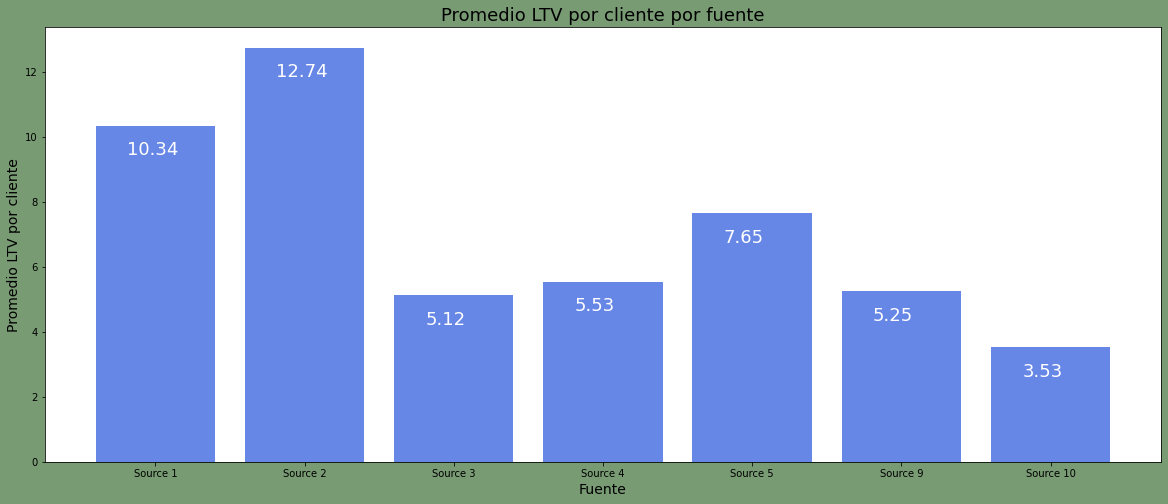

In [86]:
n = len(ltv_source['ltv_customer'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, ltv_source['ltv_customer'],
        align='center',
        alpha=0.8, 
        color='royalblue')

fig.patch.set_facecolor('xkcd:grey green')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Promedio LTV por cliente', fontsize=14)
plt.title('Promedio LTV por cliente por fuente', fontsize=18)
plt.xticks(ind, ltv_source['label'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.21, 
            i.get_height()-0.9, 
            float(int(ltv_source['ltv_customer'][idx]*100)/100), 
            fontsize=18,color='white')
plt.show()

Los clientes de las fuentes # 1 y # 2 nos generan más ingresos a largo plazo. Si es rentable atraer a más clientes de estas fuentes, debemos aumentar el número de pedidos de estas fuentes. Como ya se sabe, estas fuentes representan alrededor del 10% de los pedidos.

- Beneficio medio por cliente por cohorte

In [87]:
orders_all['first_day_of_month_actual_order'] = (
    pd.to_datetime(orders_all['actual_date'], unit='d') 
    -
    pd.to_timedelta(orders_all['actual_date'].dt.day - 1, unit='d') 
)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Otra forma es usando `orders_all['actual_date'].astype('datetime64[M]')`
</div>

In [88]:
orders_all['cohort_lifetime'] = (
    round(((orders_all['first_day_of_month_actual_order'] 
            -
            orders_all['first_day_of_month_first_session']) / 
           np.timedelta64(1,'M'))).astype(int)
)

In [89]:
cohorts_ltv = (
    orders_all.query('actual_date != "2018-06-01"').
    groupby(['first_day_of_month_first_session','cohort_lifetime']).
    agg({'revenue':['sum','count']}).
    reset_index().reset_index()
)
cohorts_ltv.columns = ['index',
                       'first_day_of_month_first_session',
                       'cohort_lifetime',
                       'revenue',
                       'count_orders']
cohorts_ltv_0 = (
    orders_all.
    groupby('first_day_of_month_first_session').
    agg({'uid':'nunique'}).reset_index()
)
cohorts_ltv_0 = cohorts_ltv_0.rename(columns = {'uid':'count_orders_all'})
cohorts_ltv = cohorts_ltv.merge(cohorts_ltv_0, on = 'first_day_of_month_first_session')

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, aunque tal vez sería mejor el nombre count_users en vez de count_orders_all
</div>

In [90]:
cohorts_cumsum = ( 
    cohorts_ltv.
    groupby('first_day_of_month_first_session').
    agg({'revenue':'cumsum'}).
    reset_index()
)
cohorts_cumsum = cohorts_cumsum.rename(columns = {'revenue':'revenue_all'})
cohorts_ltv = cohorts_ltv.merge(cohorts_cumsum, on = 'index')
cohorts_ltv['revenue_per_user'] = cohorts_ltv['revenue_all']/cohorts_ltv['count_orders_all']
cohorts_ltv = cohorts_ltv[cohorts_ltv['first_day_of_month_first_session'] != '2018-06-01']
cohorts_ltv['first_day_of_month_first_session_str'] = ( 
    cohorts_ltv['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, muy bien. También se podía calcular el acumulado después de calcular el revenue por usuario por cohorte, mes.
</div>

In [91]:
cohorts_ltv_pivot_table = cohorts_ltv.pivot_table(index = 'first_day_of_month_first_session_str',
                                              columns = 'cohort_lifetime',
                                              values = 'revenue_per_user',
                                              aggfunc = 'sum')

Text(0.5, 51.0, 'Cohorte Lifetime')

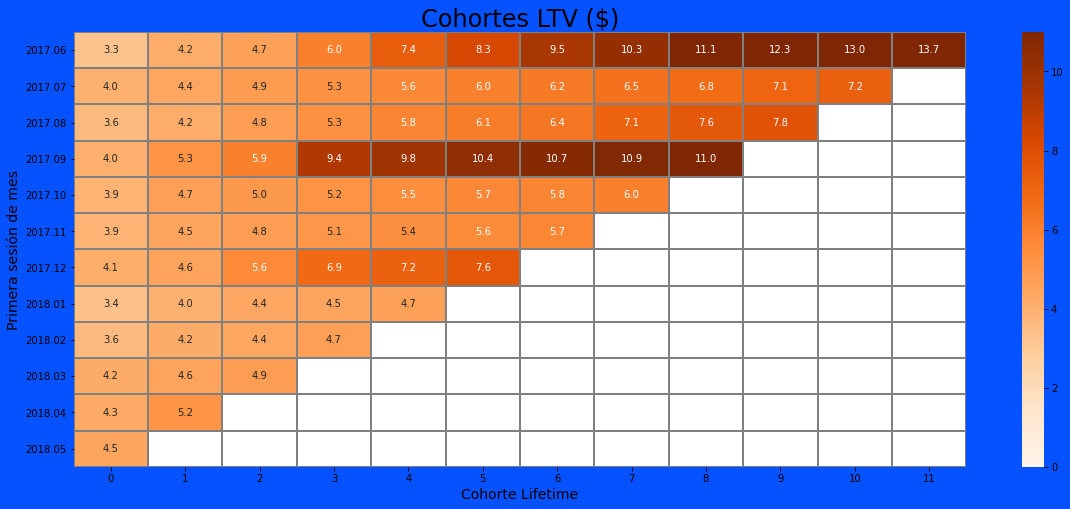

In [92]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:electric blue')
plt.title('Cohortes LTV ($)', fontsize=24)
    
sns.heatmap(cohorts_ltv_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 11,
            cmap = 'Oranges' 
           )
ax.set_ylabel('Primera sesión de mes', fontsize=14)    
ax.set_xlabel('Cohorte Lifetime', fontsize=14)

En promedio, cada cliente de la primera cohorte nos generó 13.7 dólares aprox en ingresos durante los once meses que estuvo activo. Como podemos ver, no todos los clientes nos generan los mismos ingresos. Las cuatro primeras cohortes fueron las más rentables. También es interesante destacar el fuerte aumento de LTV en la tercera cohorte en el cuarto mes, de 5.9 a 9.4 dólares.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El procedimiento realizado está muy bien, aunque el resultado difiere un poco de lo esperado. Como mencioné anteriormente, para las métricas acerca de pedidos, se mira tipicamente el mes de primera orden como cohorte.
</div>

### Marketing

#### ¿Cuánto dinero se gastó?

- Costos diarios

In [93]:
costs_daily = costs.groupby('dt').agg({'costs':'sum'})

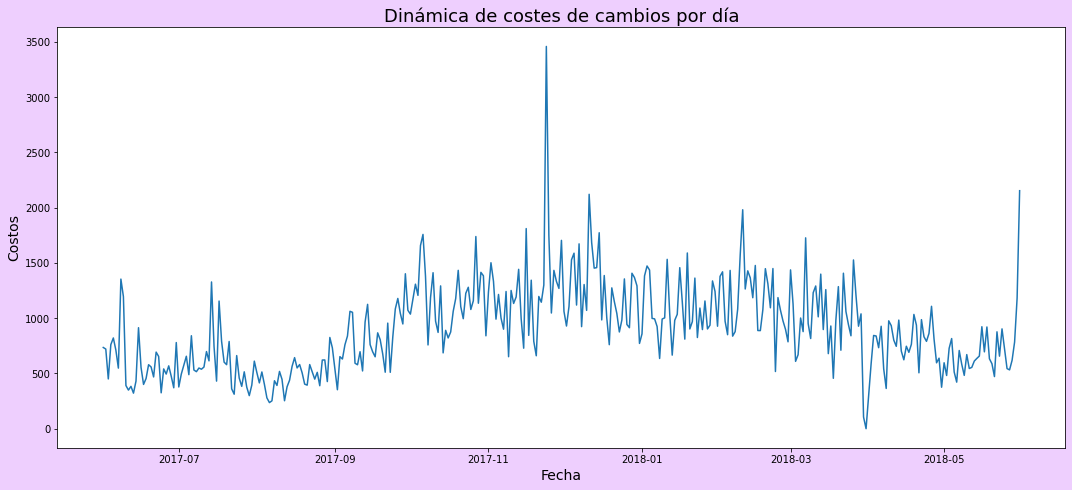

In [94]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(costs_daily, )
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Costos', fontsize=14)
ax.set_title('Dinámica de costes de cambios por día', fontsize=18)
fig.patch.set_facecolor('xkcd:pale lavender')

plt.show()

Este gráfico es muy similar al del número de visitas diarias, lo cual tiene mucho sentido, ya que las visitas dependen directamente del dinero que gastamos en publicidad. A partir del mes de agosto, se ha visto un aumento de los costes de publicidad. De octubre a marzo, los costes se han mantenido aproximadamente al mismo nivel, y a partir de marzo, han disminuido.

También se ve un fuerte aumento diario de los costes el 24 de noviembre de 2017, de 1,200 a 3,500 dólares. Esto explica por qué en las partes anteriores vimos un número anormal de pedidos, visitas e ingresos durante el mismo periodo.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

- ¿Cuánto se gastó en cada fuente?

In [95]:
costs_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_source['label'] = costs_source.apply(create_label,axis=1)

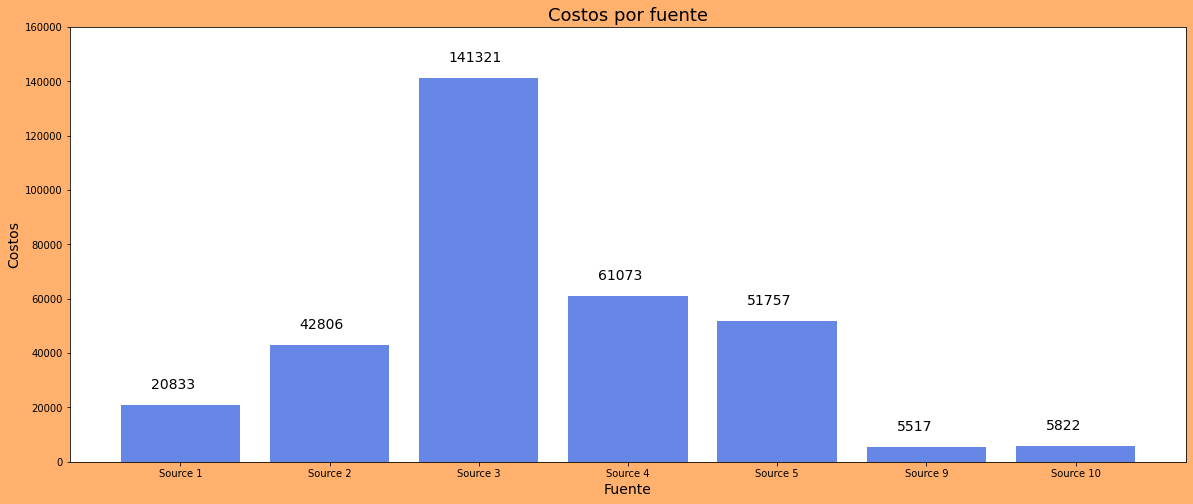

In [96]:
n = len(costs_source['costs'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, costs_source['costs'],
        align='center',
        alpha=0.8, 
        color='royalblue')

fig.patch.set_facecolor('xkcd:apricot')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Costos', fontsize=14)
plt.title('Costos por fuente', fontsize=18)
plt.xticks(ind, costs_source['label'] )
ax.set_ylim([0, 160000])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.2, 
            i.get_height() + 6000, 
            int(costs_source['costs'][idx]), 
            fontsize=14,color='black')
plt.show()

La fuente # 3 cuesta más de 2.5 veces más que la fuente # 4, pero, como ya mencioné, ambas fuentes generan aproximadamente el mismo número de pedidos. Es evidente que se debe redistribuir el presupuesto de publicidad entre las fuentes # 3 y # 4.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

#### El coste de captación de clientes

- Coste de captación de clientes por fuente

In [97]:
source_number_buyers = orders_all.query('source_id != 7').groupby('source_id',as_index = False).agg({'uid':'nunique'})
costs_source = costs_source.merge(source_number_buyers, on = 'source_id')
costs_source = costs_source.rename(columns = {'uid':'count_buyers'})

In [98]:
costs_source['cac'] = costs_source['costs'] / costs_source['count_buyers']

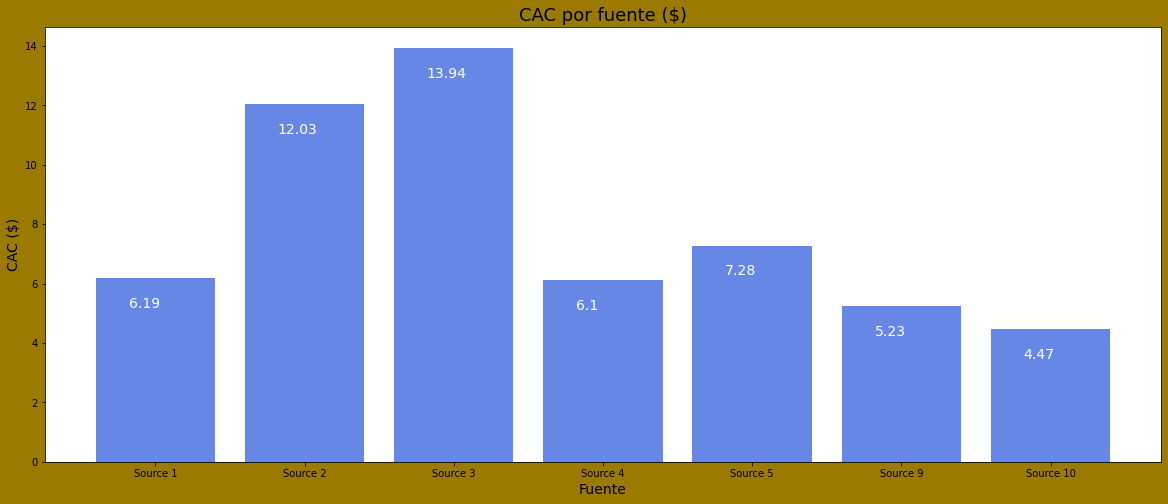

In [99]:
n = len(costs_source['cac'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, costs_source['cac'],
        align='center',
        alpha=0.8, 
        color='royalblue')

fig.patch.set_facecolor('xkcd:yellowish brown')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('CAC ($)', fontsize=14)
plt.title('CAC por fuente ($)', fontsize=18)
plt.xticks(ind, costs_source['label'] )
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.22, 
            i.get_height() - 1 , 
            float(int(costs_source['cac'][idx]*100)/100), 
            fontsize=14,color='white')
plt.show()

La fuente # 2 y la fuente # 3 son las más caras para atraer clientes. En el caso de la fuente # 2, esto se justifica de alguna manera porque el LTV es lo suficientemente alto. Sin embargo, en el caso de la fuente # 3, el LTV es muy bajo y el coste de atraer un nuevo cliente es muy alto.

In [161]:
costs_daily1 = costs.groupby('source_id').sum()

In [162]:
costs_daily1

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


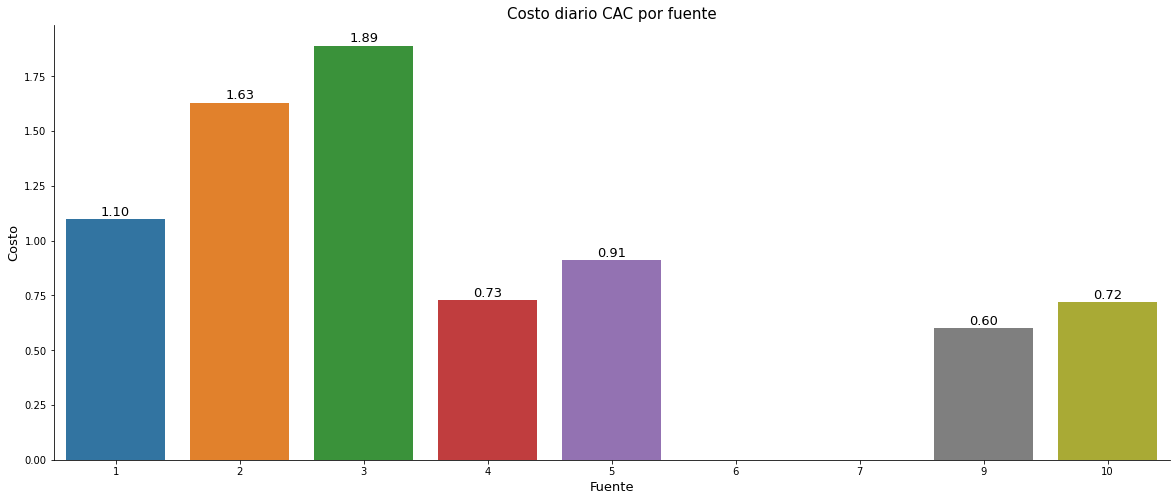

In [171]:
sum_costs = costs_daily1.groupby(['source_id']).sum()
sum_costs.index = sum_costs.index.astype(int)
group_by_source = pd.merge(visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index(),
                           sum_costs,
                           on='source_id',
                           how='left')
group_by_source['cac'] = round(group_by_source.costs / group_by_source.uid, 2)
plt.figure(figsize=(20, 8))
bar = sns.barplot(x='source_id', y='cac', data=group_by_source)
sns.despine()
plt.xlabel('Fuente', size=13)
plt.ylabel('Costo', size=13)
plt.title('Costo diario CAC por fuente', size=15)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 size=13,
                 xytext=(0, 7),
                 textcoords='offset points')

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Este cac está bien pero es un poco simplista, el costo de marketing varia día a día, por lo tanto es más preciso calcular el cac diario y luego se puede abreviar con una media o mediana para representar el cac por fuente. Por favor realiza el cálculo de esta manera y comparalo con el que calculaste aquí
</div>

- El coste de atraer clientes por cohorte

In [100]:
costs['first_day_of_month_first_session'] = (
    pd.to_datetime(costs['dt'], unit='d') 
    -
    pd.to_timedelta(costs['dt'].dt.day - 1, unit='d') 
)
costs_month = ( 
    costs.
    groupby('first_day_of_month_first_session', as_index = False).
    agg({'costs':'sum'})
)

In [101]:
costs_month = costs_month.merge(cohorts_ltv_0, on = 'first_day_of_month_first_session')

costs_month['cac'] = costs_month['costs'] / costs_month['count_orders_all'] 
costs_month['first_month_str']= ( 
    costs_month['first_day_of_month_first_session'].dt.strftime('%m.%Y')
)

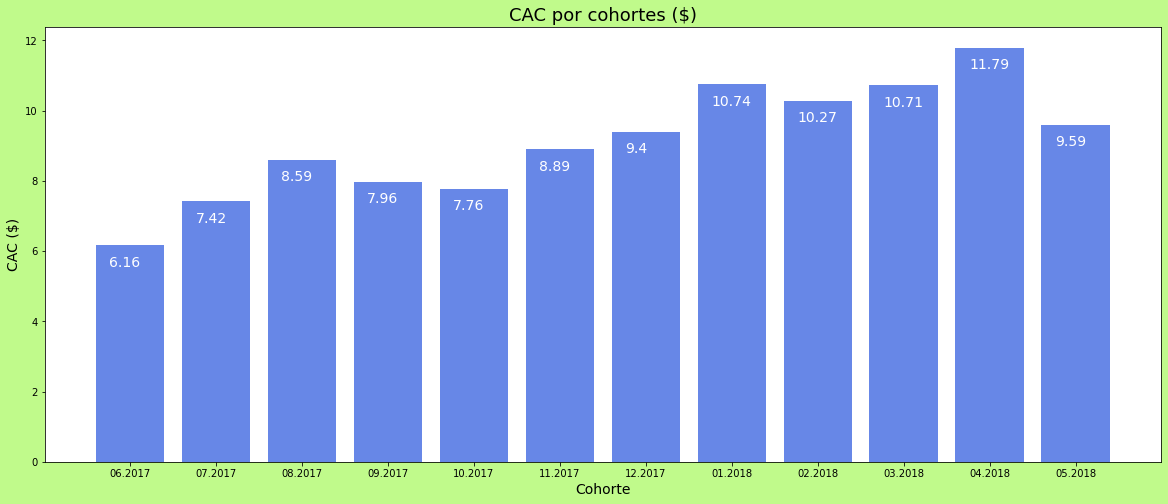

In [102]:
n = len(costs_month['cac'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(ind, costs_month['cac'],
        align='center',
        alpha=0.8, 
        color='royalblue')

fig.patch.set_facecolor('xkcd:pistachio')
plt.xlabel('Cohorte', fontsize=14)
plt.ylabel('CAC ($)', fontsize=14)
plt.title('CAC por cohortes ($)', fontsize=18)
plt.xticks(ind, costs_month['first_month_str'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.16, 
            i.get_height()-0.6, 
            float(int(costs_month['cac'][idx]*100)/100), 
            fontsize=14,color='white')
plt.show()

Cuanto más tiempo pasa, más costará atraer clientes. También se sabe que algunos clientes tardan más de 30 días en hacer su primera compra. Esto significa que los costes de atraer clientes en las cohortes de abril y mayo de 2018 serán más bajos.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Este es opcional respecto al anterior, y al menos se consideró los distintos costos mes a mes, me parece mejor que el anterior.
</div>

#### Evaluación del retorno de la inversión en captación de clientes. (ROI)

In [103]:
cohorts_revenue = ( 
    orders_all.
    groupby('first_day_of_month_first_session', as_index = False).
    agg({'revenue':'sum'})
)

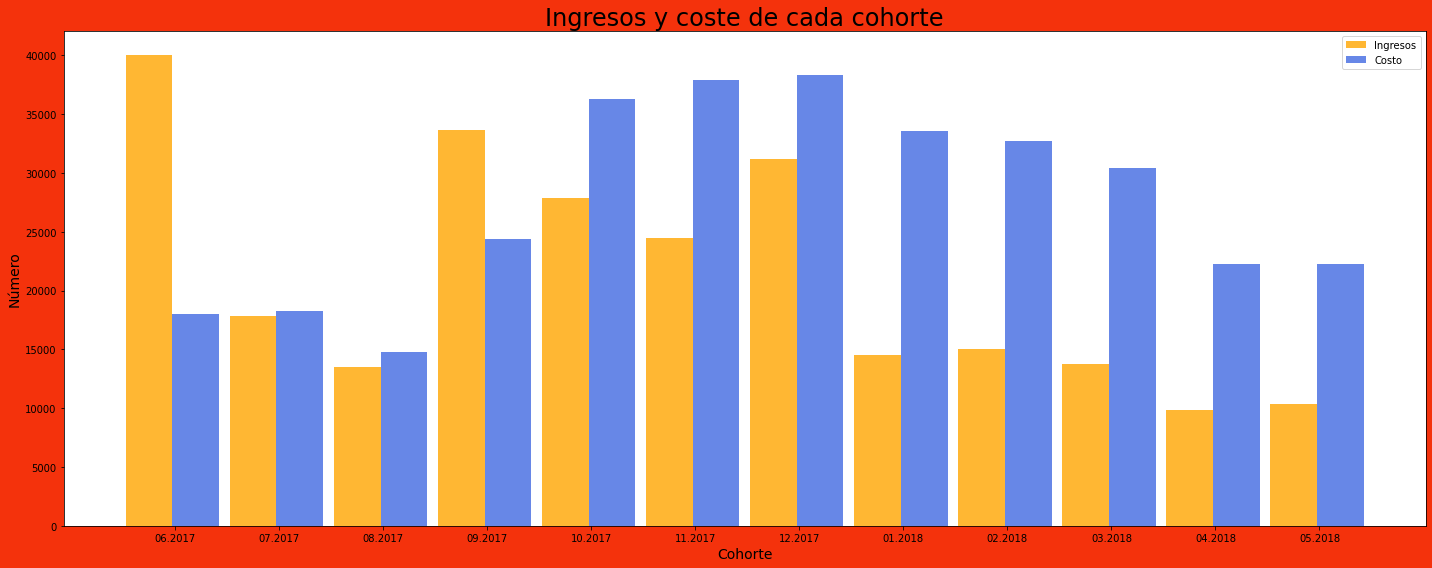

In [104]:
all_cohorts_dict = list(costs_month['first_month_str'].tolist()) 
n_groups = len(all_cohorts_dict)

fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:vermillion')
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.8
rects1 = plt.bar(index, cohorts_revenue['revenue'], bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Ingresos')

rects2 = plt.bar(index + bar_width, costs_month['costs'], bar_width,
                 alpha=opacity,
                 color='royalblue',
                 label='Costo')

plt.xlabel('Cohorte', fontsize=14)
plt.ylabel('Número', fontsize=14)
plt.title('Ingresos y coste de cada cohorte', fontsize=24)

plt.xticks(index + bar_width-0.2, all_cohorts_dict)
plt.legend()

plt.tight_layout()
plt.show()

El histograma muestra que solo en 2 cohortes los ingresos superan a los costes. Esto significa que se tiene que encontrar las áreas en las que se está perdiendo dinero y hacer cambios para mejorar.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con esta comparación, ahora se puede ahondar dividiendo por cohorte y fuente y cómo han evolucionado en el tiempo
</div>

- ROMI por cohorte

In [105]:
cohorts_romi = (
    cohorts_ltv.
    merge(costs_month[['first_day_of_month_first_session','costs']],
          on = 'first_day_of_month_first_session')
)
cohorts_romi['romi'] = cohorts_romi['revenue_all'] / cohorts_romi['costs']

In [106]:
cohorts_romi

,index,first_day_of_month_first_session,cohort_lifetime,revenue,count_orders,count_orders_all,revenue_all,revenue_per_user,first_day_of_month_first_session_str,costs,romi
0,0,2017-06-01,0,9557.49,2354,2923,9557.49,3.27,2017.06,18015.00,0.53
1,1,2017-06-01,1,2664.58,387,2923,12222.07,4.18,2017.06,18015.00,0.68
2,2,2017-06-01,2,1464.69,273,2923,13686.76,4.68,2017.06,18015.00,0.76
3,3,2017-06-01,3,3882.09,442,2923,17568.85,6.01,2017.06,18015.00,0.98
4,4,2017-06-01,4,3940.59,516,2923,21509.44,7.36,2017.06,18015.00,1.19
...,...,...,...,...,...,...,...,...,...,...,...
73,73,2018-03-01,1,984.00,267,2838,12995.39,4.58,2018.03,30415.27,0.43
74,74,2018-03-01,2,774.77,201,2838,13770.16,4.85,2018.03,30415.27,0.45
75,75,2018-04-01,0,8043.82,1946,1890,8043.82,4.26,2018.04,22289.38,0.36
76,76,2018-04-01,1,1838.73,339,1890,9882.55,5.23,2018.04,22289.38,0.44


In [107]:
cohorts_romi_pivot_table = cohorts_romi.pivot_table(index = 'first_day_of_month_first_session_str',
                                                    columns = 'cohort_lifetime',
                                                    values = 'romi',
                                                    aggfunc = 'sum')

Text(0.5, 51.0, 'Cohorte Lifetime')

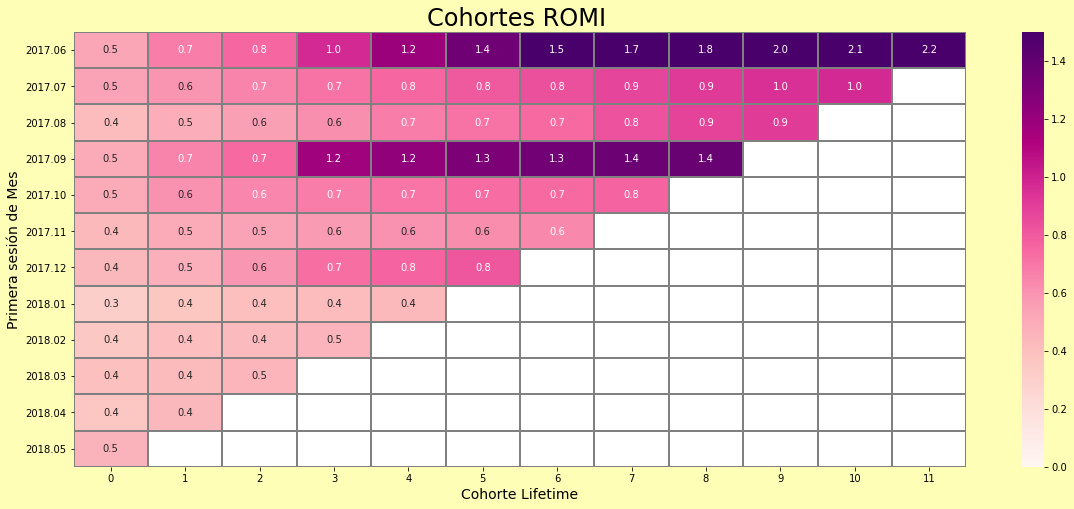

In [108]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:light beige')
plt.title('Cohortes ROMI ', fontsize=24)
    
sns.heatmap(cohorts_romi_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1.5,
            cmap = 'RdPu' 
           )
ax.set_ylabel('Primera sesión de Mes', fontsize=14)    
ax.set_xlabel('Cohorte Lifetime', fontsize=14)

Sin duda se está perdiendo dinero. La inversión que se hizo en publicidad no está funcionando. Solo en tres cohortes (1, 2 y 4) los ingresos superaron a los costos. Si los costos no se amortizan con el tiempo, este modelo de negocio no puede considerarse exitoso. Se tienen que hacer cambios urgentes.

Tampoco se puede saber en qué mes las cohortes recuperarán el dinero que se invirtió en atraer clientes. Solo 3 cohortes han recuperado su inversión inicial, y 2 de ellas tienen un comportamiento claramente anormal. Con los datos que se tienen, es difícil hacer una previsión precisa.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En general estoy de acuerdo con tus conclusiones pero complementaría con lo siguiente: para decidir si la inversión es exitosa o no, hay que tener una meta o criterio de éxito, por ejemplo, que se paguen los costos al 4to o 5o mes (porque si no invertimos más, tal vez en muchos meses más adelante tendremos todos con romi mayor a 1 pero eso no sirve). Si ponemos un criterio así, vemos que nuestras acciones de gasto en mkt hacen que el retorno sea similar al 5to mes, pues hay dos cohortes que no consideramos por ser anormales. Otro dato importante a incluir es el tamaño de la cohorte, para saber qué influencia tiene 
</div>

- ROMI por fuente

In [109]:
source_romi = orders_all[['revenue',
                          'first_session',
                          'source_id',
                          'actual_date',
                          'first_day_of_month_first_session',
                          'first_day_of_month_actual_order']]

In [110]:
source_romi['cohort_lifetime'] = (
    round(
        (((orders_all['first_day_of_month_actual_order'] 
           -
           orders_all['first_day_of_month_first_session']) / 
          np.timedelta64(1,'M')))).astype(int)
)

/tmp/ipykernel_45/3288455964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_romi['cohort_lifetime'] = (


In [111]:
source_lifetime = (
    source_romi.
    groupby(['source_id','cohort_lifetime'],as_index = False).
    agg({'revenue':'sum'}).reset_index()
)

In [112]:
source_cumsum = ( 
    source_lifetime.
    groupby('source_id').
    agg({'revenue':'cumsum'}).reset_index()
)
source_cumsum = source_cumsum.rename(columns = {'revenue':'revenue_source'})

In [113]:
source_lifetime = source_lifetime.merge(source_cumsum, on = 'index')

In [114]:
source_cost = costs.groupby('source_id',as_index = False).agg({'costs':'sum'})

In [115]:
source_lifetime = source_lifetime.merge(source_cost, on = 'source_id')

In [116]:
source_lifetime['romi'] = source_lifetime['revenue_source'] / source_lifetime['costs']
source_lifetime['label'] = source_lifetime.apply(create_label,axis=1)

In [117]:
source_lifetime_pivot_table = source_lifetime.pivot_table(index = 'label',
                                                          columns = 'cohort_lifetime',
                                                          values = 'romi',
                                                          aggfunc = 'sum')

Text(0.5, 51.0, 'Cohorte Lifetime')

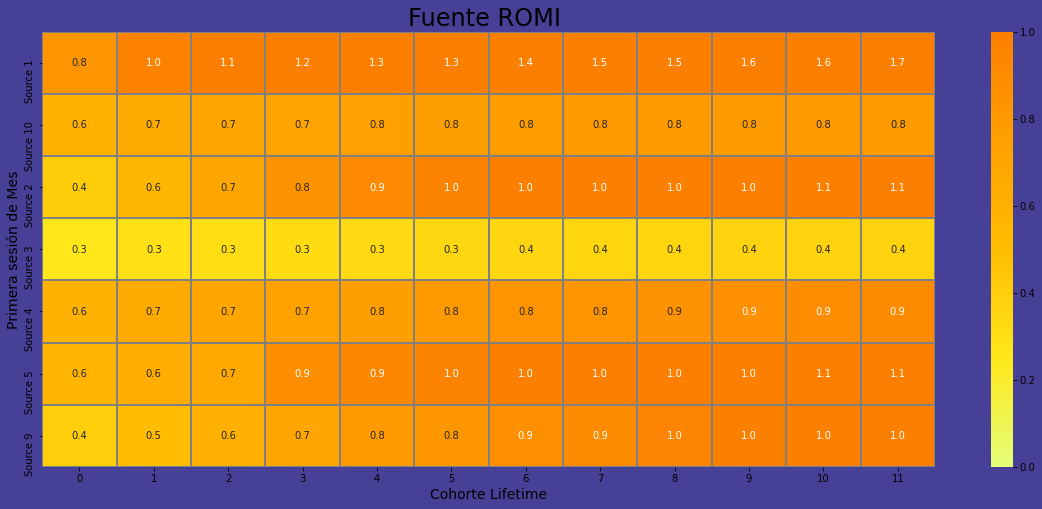

In [118]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:blueberry')
plt.title('Fuente ROMI ', fontsize=24)
    
sns.heatmap(source_lifetime_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1,
            cmap = 'Wistia' 
           )
ax.set_ylabel('Primera sesión de Mes', fontsize=14)    
ax.set_xlabel('Cohorte Lifetime', fontsize=14)

En el apartado anterior, descubrí que casi todos los grupos de clientes no generan suficiente retorno de la inversión en adquisición de clientes. En esta sección, se ve que las inversiones en las fuentes # 10, # 3 y # 4 deben detenerse de inmediato, ya que el coste de adquisición es superior a los ingresos generados por los clientes. La fuente # 9 está a punto de alcanzar la rentabilidad, pero si no se encuentran formas de aumentar el LTV o reducir el CAC, también se debería abandonar esta fuente. La fuente # 1 es la más popular, y si hay una oportunidad de aumentar el número de clientes de esta fuente, se debería hacer.

Se observa también que la fuente # 3 es la que más gasta en adquisición de clientes, pero estas inversiones no son rentables. El panorama general no parece ser financieramente sólido, y la mayoría de los grupos de clientes no son rentables. Sin embargo, si no fuera por la gran inversión que se ha hecho en la fuente # 3, la mayoría de los grupos de clientes serían rentables.

Voy a simular la situación sin la fuente # 3.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente trabajo, esta visión es la más importante, pues nos permite observar si a cierta fecha el gasto realizado en las fuentes ha servido. Se puede mejorar esta métrica considerando el costo por mes, para que tengamos una mejor visibilidad de lo que ocurre cada mes y si fijamos un criterio (por ejemplo tener rentabilidad al mex 5) podemos revisar si se cumple incluyendo las diferencias de gastos que se hacen cada mes.
</div>

In [119]:
cohorts_ltv_forecast = (
    orders_all.
    query('source_id != 3 & actual_date != "2018-06-01"').
    groupby(['first_day_of_month_first_session','cohort_lifetime']).
    agg({'revenue':['sum','count']}).
    reset_index().reset_index()
)
cohorts_ltv_forecast.columns = ['index',
                                'first_day_of_month_first_session',
                                'cohort_lifetime',
                                'revenue',
                                'count_orders']
cohorts_ltv_0_forecast = (
    orders_all.
    query('source_id != 3').
    groupby('first_day_of_month_first_session').
    agg({'uid':'nunique'}).reset_index()
)
cohorts_ltv_0_forecast = cohorts_ltv_0_forecast.rename(columns = {'uid':'count_orders_all'})
cohorts_ltv_forecast = ( 
    cohorts_ltv_forecast.
    merge(cohorts_ltv_0_forecast, on = 'first_day_of_month_first_session')
)

In [120]:
cohorts_cumsum_forecast = ( 
    cohorts_ltv_forecast.
    groupby('first_day_of_month_first_session').
    agg({'revenue':'cumsum'}).
    reset_index()
)
cohorts_cumsum_forecast = cohorts_cumsum_forecast.rename(columns = {'revenue':'revenue_all'})
cohorts_ltv_forecast = cohorts_ltv_forecast.merge(cohorts_cumsum_forecast, on = 'index')
cohorts_ltv_forecast['revenue_per_user'] = ( 
    cohorts_ltv_forecast['revenue_all']
    /
    cohorts_ltv_forecast['count_orders_all']
)
cohorts_ltv_forecast = cohorts_ltv_forecast[cohorts_ltv_forecast['first_day_of_month_first_session'] != '2018-06-01']
cohorts_ltv_forecast['first_day_of_month_first_session_str'] = ( 
    cohorts_ltv_forecast['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

In [121]:
costs_month_forecast = (
    costs.
    query('source_id != 3').
    groupby('first_day_of_month_first_session').
    agg({'costs':'sum'}).reset_index()
)

In [122]:
cohorts_romi_forecast = (
    cohorts_ltv_forecast.
    merge(costs_month_forecast[['first_day_of_month_first_session','costs']],
          on = 'first_day_of_month_first_session')
)
cohorts_romi_forecast['romi'] = cohorts_romi_forecast['revenue_all'] / cohorts_romi_forecast['costs']

In [123]:
cohorts_romi_pivot_table_forecast = ( 
    cohorts_romi_forecast.
    pivot_table(index = 'first_day_of_month_first_session_str',
                columns = 'cohort_lifetime',
                values = 'romi',
                aggfunc = 'sum')
)

Text(0.5, 51.0, 'Cohorte Lifetime')

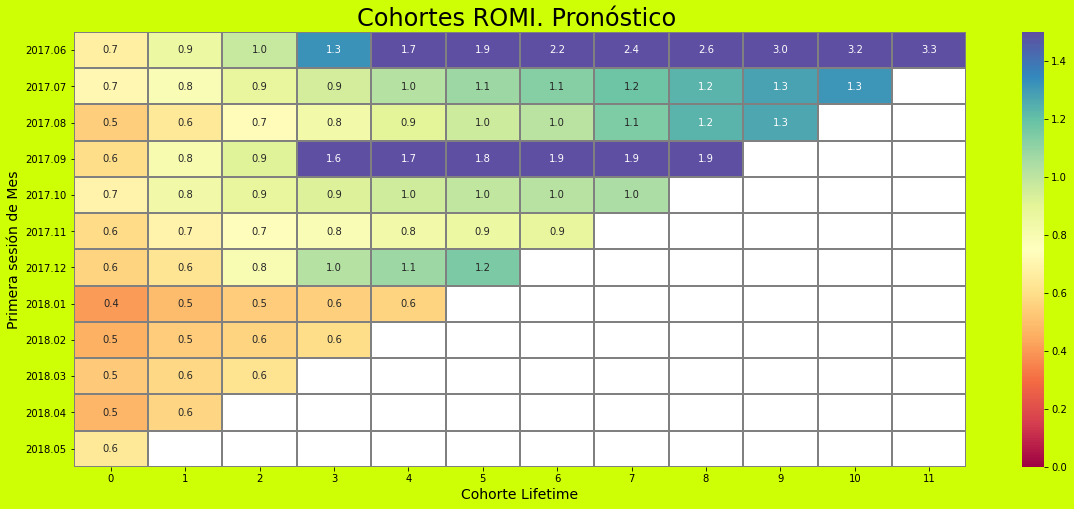

In [124]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:neon yellow')
plt.title('Cohortes ROMI. Pronóstico ', fontsize=24)
    
sns.heatmap(cohorts_romi_pivot_table_forecast, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1.5,
            cmap = 'Spectral' 
           )
ax.set_ylabel('Primera sesión de Mes', fontsize=14)    
ax.set_xlabel('Cohorte Lifetime', fontsize=14)

Como era de esperar, si se elimina los costes y las ventas de la fuente # 3, el modelo de negocio parece mucho más prometedor. En unos 4 meses aprox, todos los grupos de clientes recuperarían la inversión y comenzarían a generar beneficios.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Me parece excelente idea hacer este recálculo sin considerar los usuarios de fuente 3. Ojo que no lo llamaría pronóstico.
</div>

In [125]:
romi_monthly_forecast = cohorts_romi_pivot_table_forecast.mean(axis=0).reset_index() 
romi_monthly_forecast

,cohort_lifetime,0
0,0,0.57
1,1,0.68
2,2,0.77
3,3,0.96
4,4,1.09
5,5,1.25
6,6,1.35
7,7,1.54
8,8,1.75
9,9,1.84


# Conclusiones

- Fuente #1: Sin duda el mejor canal, con un excelente retorno de la inversión y una alta tasa de conversión. El equipo debe centrarse en aumentar el número de clientes de este canal.
- Fuente #2: Un buen canal con buenos resultados. Se debe centrar en aumentar el valor de vida del cliente y reducir el coste de adquisición del cliente.
- Fuente #3: El canal con los peores resultados. El equipo debe detener urgentemente la inversión en este canal y averiguar por qué los costes son tan altos y las ventas tan bajas.
- Fuente #4: El canal no es rentable. Se debe aumentar el valor de vida del cliente y reducir el coste de adquisición del cliente. Si esto no funciona, se debe dejar de invertir en este canal.
- Fuente #5: Un buen canal con buenos resultados. Se debe centrar en aumentar el valor de vida del cliente y reducir el coste de adquisición del cliente.
- Fuente #9: El canal está al borde de la rentabilidad. Su cuota de mercado es pequeña. El equipo debe aumentar el valor de vida del cliente y reducir el coste de adquisición del cliente para que sea más atractivo para el negocio.
- Fuente #10: El canal no es rentable. Su cuota de mercado es pequeña. El equipo debe aumentar el valor de vida del cliente y reducir el coste de adquisición del cliente. Si esto no funciona, se debe dejar de invertir en este canal.




Yandex.Afisha se podría decir que tuvo éxito en este periodo de tiempo, ya que aumentó el número de usuarios activos y el número de pedidos. Ahora se tienen que centrar en aumentar el tamaño medio de las compras y la retención de los usuarios. También hay que tener en cuenta que cada vez más usuarios utilizan dispositivos portátiles. Por lo que se tiene que averiguar por qué las sesiones largas desde dispositivos portátiles son tan escasas. Puede que sea o no conveniente prestar atención a eso.

Para mantener el nivel, se tiene que seguir prestando atención a la versión de escritorio/PC, a la fuente # 4 con su número de pedidos y a la fuente # 1 y # 2 con sus ingresos.

Si se queire aumentar la rentabilidad, se tiene que convertir a los usuarios de la fuente # 4 con su número de pedidos en usuarios de la fuente # 1 y # 2 con sus más pedidos.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien con las conclusiones, te aconsejo que agregues más resultados numéricos para justificar tus afirmaciones con métricas.
</div>